# **Capstone Project | Final Submission:** Automatic Ticket Assignment

This report submission is done by the team Group 9B comprising of Rohit Bhat/ Swayam P Behera / Sridhar Krishnan / Gagandeeep Kaur

# **01. Setting the context:** Recap of the Interim submission and approach for final submission

This Capstone project is to evaluate classification models to enable automatic ticket assignment in IT support process.As part of interim submission following activities were carrried out:
> 1. EDA of the source data
> 2. Preprocess to clean the data to remove noise
> 3. Identify inconsistencies and data issues
> 4. Prepare cleaned data
> 5. Create embedding using several techniques
> 6. Evalute classic, ensemble, neural network and transformer models ( refer image shown below)
> 7. Identify models that are considered for hyper parameter tuning and further evaluation ( refer image shown below)

Following was the summary of model scores evaluated as part of interim submission:

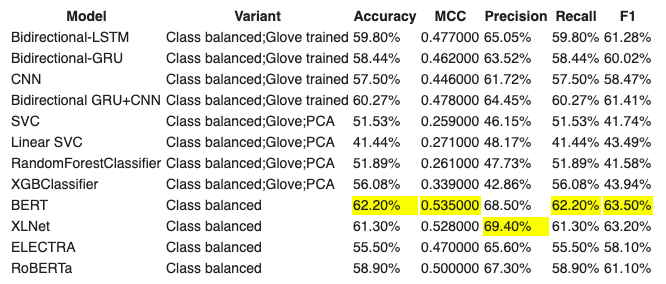

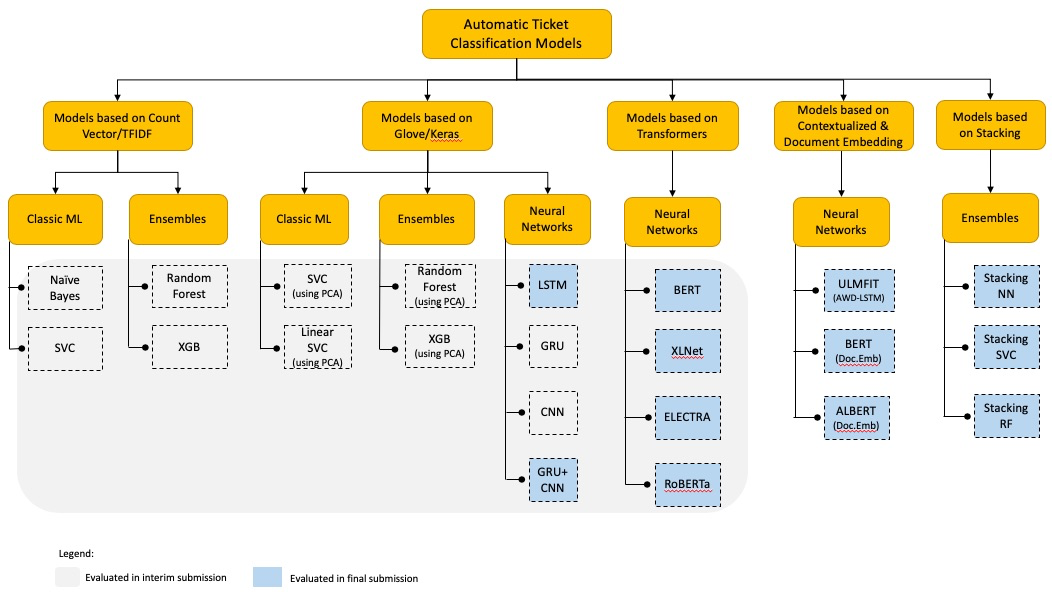

>- This workbook for final submission,covers model evaluation, hyper parameter tuning, comparison 
and final evaluation of the models  selected for further evaluation (as highlighted in blue box in the picture above)
>- As noted in the interim submission , classic ml models and the related ensembles did not give encouraging scores to justify selection for model evaluation and tuning
>- Hence models based on neural network and state of the art architectures are considered for evaluation and hyper parameter tuning
>- For this purpose the embedding considered are  both static embeddings (Glove) as well as contexualized document embedding, transformer word embeddings
>- Additionally blended approach to models is also evaluated , where outputs of transformer models are stacked based on various approach and results compared for evaluation
>- For each of the models selected, hyperparameters are tuned ( mainly optimizer,batch size,learning rate,weight decay,epoch)
>- For hyperparameter tuning, Gridsearch approach is used in some cases and full model exeuction is done in some cases iteratively
>- In cases where Gridsearch is done, the resultant values of the execution is displayed in the workbook and justification on best parameter selection is provided
>- In cases where full model execution is done iteratively for hyperparameter tuning, the results of all iterations is reported for comparison purpose while the notebook will have the model exeuction reported based on the best parameter selected. This is done to ensure better readability of the notebook
>- Finally for the top 4 models ( post hyperparameter tuning), crossvalidation is done to generate mean , standard deviation scores and confidence ranges for MCC, F1 and Accuracy and final model selection is based on cross validated results for MCC and F1
>- Appropriate visualizations have also been included alongside key observations, whereever relevant and several plot types (barplot, slope plot,scatter plot, radar plot, parallel plot) have been leveraged for this purpose

# **02. Set up:** Installing dependencies, importing libraries, setting up folders and loading the dataset

## **2.1 Setting up folder and Installing dependencies**

In [0]:
%tensorflow_version 2.x

In [0]:
import os

# libraries for mounting google drive for using GC

from google.colab import drive

In [0]:
# mounting the drive on Google Colab

drive.mount('/content/drive')

# changing the directory to point to project folder

os.chdir('/content/drive/My Drive/AIML/Projects/Capstone')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# installing apex (from github) for transformer models

!sh setup.sh

Cloning into 'apex'...
remote: Enumerating objects: 151, done.
remote: Counting objects: 100% (151/151), done.
remote: Compressing objects: 100% (96/96), done.
remote: Total 7163 (delta 112), reused 86 (delta 55), pack-reused 7012
Receiving objects: 100% (7163/7163), 13.83 MiB | 5.66 MiB/s, done.
Resolving deltas: 100% (4826/4826), done.
Checking out files: 100% (281/281), done.
Created temporary directory: /tmp/pip-ephem-wheel-cache-h7imy8c3
Created temporary directory: /tmp/pip-req-tracker-xrvtyxiq
Created requirements tracker '/tmp/pip-req-tracker-xrvtyxiq'
Created temporary directory: /tmp/pip-install-hf_z2gt3
Processing /content/drive/My Drive/AIML/Projects/Capstone/apex
  Created temporary directory: /tmp/pip-req-build-u1wlg5a9
  Added file:///content/drive/My%20Drive/AIML/Projects/Capstone/apex to build tracker '/tmp/pip-req-tracker-xrvtyxiq'
    Running setup.py (path:/tmp/pip-req-build-u1wlg5a9/setup.py) egg_info for package from file:///content/drive/My%20Drive/AIML/Projects/

In [0]:
# installing environment dependencies

In [0]:
pip install -r requirements.txt

In [0]:
### importing all relevant libraries

import warnings
warnings.filterwarnings('ignore')

# libraries for basic utility functions , array / dataframes handling 

import time
import numpy as np
import pandas as pd
from math import pi


# libraries for visualization

import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

# libraries for text processing

from itertools import groupby
import re
from bs4 import BeautifulSoup
import nltk


# libraries for preprocessing, model building, and evaluation 

import tensorflow as tf
print ('Tensorflow version:',tf.__version__)
from tensorflow.keras.backend import clear_session
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, Flatten,LSTM, Embedding, Dropout, Bidirectional, GlobalMaxPool1D,SpatialDropout1D,GRU
from tensorflow.keras.layers import  Conv1D,Conv2D, Reshape, MaxPooling1D,MaxPool2D,Concatenate,Activation,GlobalAveragePooling1D,GlobalMaxPooling1D
from tensorflow.keras.models import Model, Sequential,load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.utils import plot_model
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow import random

import scipy.stats as stats
from sklearn.preprocessing import StandardScaler,LabelEncoder,LabelBinarizer
from sklearn.feature_selection import chi2
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.decomposition import PCA
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC,LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.utils import class_weight

# libraries for transformers based models

from simpletransformers.classification import ClassificationModel



Tensorflow version: 2.2.0


In [0]:
#libraries for Advanced NLP Modeeling 

# fastai libraries
import fastai
from fastai import *
from fastai.text import * 
from functools import partial
import io

# flair library 
import torch

import flair

from flair.data import Sentence

from flair.data_fetcher import NLPTaskDataFetcher

from flair.embeddings import WordEmbeddings
from flair.embeddings import CharacterEmbeddings
from flair.embeddings import StackedEmbeddings
from flair.embeddings import FlairEmbeddings
from flair.embeddings import PooledFlairEmbeddings
from flair.embeddings import BertEmbeddings
from flair.embeddings import ELMoEmbeddings
from flair.embeddings import DocumentLSTMEmbeddings
from flair.embeddings import DocumentRNNEmbeddings
from flair.embeddings import FastTextEmbeddings
from flair.embeddings import OpenAIGPT2Embeddings
from flair.embeddings import TransformerXLEmbeddings
from flair.embeddings import XLNetEmbeddings
from flair.embeddings import TransformerWordEmbeddings
from flair.embeddings import TransformerDocumentEmbeddings	

from flair.models import TextClassifier
from flair.trainers import ModelTrainer
from pathlib import Path
from flair.data import Corpus
from flair.datasets import ClassificationCorpus
from flair.data import Sentence
from torch.optim.adam import Adam

In [0]:
# populating requirements.txt for dependencies installation

In [0]:
pip freeze > requirements.txt

## **2.2 Loading the dataset**

In [0]:
# loading the data file - cleaned data after text cleaning done in previous milestone 

source_file = 'cleaned_inputdata.csv'
mydata = pd.read_csv(source_file)

# printing first few rows to review the data

mydata.head(5)

Description  Group
0  login issue verified details employee manager ...      0
1  outlook team meetings skype appearing calendar...      0
2                                     cannot log vpn      0
3                         unable access hr tool page      0
4                                        skype error      0

In [0]:
# checking the data shape

print(mydata.shape)

(8467, 2)


In [0]:
# loading tokenized X and the embedding matrix ( glove 6B 200) created in interim submission for the vocabulary size

embedding_matrix_nn = np.load('embedding_matrix_200.npy')
X_glove = np.load('X_glove.npy')

In [0]:
# checking the load result

print(embedding_matrix_nn.shape)
print(len(X_glove))

(5698, 200)
8467


# **03. Milestone 3:** Model Evaluation, Tuning, Repeat and Finalization

**Setting up common functions and parameters**

In [0]:
# defining custom function to return matrices 

def calc_metrices(yt,yp):
  accuracy_score = metrics.accuracy_score(yt,yp)
  recall_score = metrics.recall_score(yt,yp,labels=None,pos_label=1,average='weighted',sample_weight=None)
  precision_score = metrics.precision_score(yt,yp,labels=None,pos_label=1,average='weighted',sample_weight=None)
  f1_score = metrics.f1_score(yt,yp,labels=None,pos_label=1,average='weighted',sample_weight=None)
  mcc = metrics.matthews_corrcoef(yt, yp, sample_weight=None)
  return accuracy_score,recall_score,precision_score,f1_score,mcc

In [0]:
# defining custom function to return plots 

def show_graph(train_loss,val_loss,train_acc,val_acc):
  figure_obj = plt.figure(figsize = (15,25))

  epochs = range(0, len(train_loss))
  ax1 = figure_obj.add_subplot(3,2,1)   
  ax1.plot(epochs, train_loss, label='Training_loss', color = 'orange')
  ax1.plot(epochs, val_loss, label='Validation_loss', color = 'blue')
  ax1.legend(loc='best')
  ax1.set_xlabel("Epochs")
  ax1.set_ylabel("Loss")
  ax1.title.set_text('Model Loss-'+ modelname)

  ax2 = figure_obj.add_subplot(3,2,2)
  ax2.plot(epochs, train_acc, label='Training_Accuracy', color = 'orange')
  ax2.plot(epochs, val_acc, label='Validation_Accuracy', color = 'blue')
  ax2.legend(loc='best')
  ax2.set_xlabel("Epochs")
  ax2.set_ylabel("Accuracy")
  ax2.title.set_text('Model Accuracy-'+ modelname)
  return plt.show()

In [0]:
# defining custom function to display slope plot ( for use in comparison of model performance post hyperparameter tuning)

def show_slopeplot(df):

  fig = plt.figure(figsize = (7, 9))
  ax = fig.add_subplot()

  for m in df["Scores"]:
      
      # prepare the data for plotting
      # extract each point and the color
      x_start = df.columns[1]
      x_finish = df.columns[2]
      y_start = df[df["Scores"] == m]["Before Tuning"]
      y_finish = df[df["Scores"] == m]["After Tuning"]
      color = df[df["Scores"] == m]["color"]
      
      # plot eac point
      ax.scatter(x_start, y_start, color = color, s = 200)
      ax.scatter(x_finish, y_finish, color = color, s = 200*(y_finish/y_start))
      
      # connect the starting point and the ending point with a line
      # check the bouns section for more
      ax.plot([x_start, x_finish], [float(y_start), float(y_finish)], linestyle = "-", color = color.values[0])
      
      # annotate the value for each continent
      ax.text(ax.get_xlim()[0] - 0.05, y_start, r'{}:{}'.format(m, float(y_start)), horizontalalignment = 'right', verticalalignment = 'center', fontdict = {'size':9})
      ax.text(ax.get_xlim()[1] + 0.05, y_finish, r'{}:{}'.format(m, float(y_finish)), horizontalalignment = 'left', verticalalignment = 'center', fontdict = {'size':9})

  # setting the range for y axis values

  ax.set_ylim([0.4,0.7])

  # get the x and y limits
  x_lims = ax.get_xlim()
  y_lims = ax.get_ylim()

  # change the x and y limits programmaticaly
  ax.set_xlim(x_lims[0] - 1, x_lims[1] + 1);

  # add 2 vertical lines
  ax.vlines(x_start, 0, y_lims[1], color = "grey", alpha = 0.3, lw = 0.8)
  ax.vlines(x_finish, 0, y_lims[1], color = "grey", alpha = 0.3, lw = 0.8)

  # set and x and y label
  #ax.set_xlabel("Comparison")
  ax.set_ylabel("Scores")

  # add a title
  ax.set_title("Comparison of Model hyperparameter tuning (Slopeplot)",fontweight='bold')

  # remove all the spines of the axes
  ax.spines["left"].set_color("None")
  ax.spines["right"].set_color("None")
  ax.spines["top"].set_color("None")
  ax.spines["bottom"].set_color("None")
  return plt.show()

In [0]:
# defining custom function to capture data required for slope plot ( capture accuracy,mcc and f1 values of models before and after tuning)

slopeplot_df= pd.DataFrame(columns=['Model','Scores','Before Tuning','After Tuning'])

def storehptcomp(mname,score,befval,aftval):
  global slopeplot_df
  hptres = {'Model':mname,'Scores':score,'Before Tuning':befval,'After Tuning':aftval} 
  slopeplot_df = slopeplot_df.append(hptres,ignore_index=True)

In [0]:
# defining custom function to store evaluation results for comparative purpose

df_result = pd.DataFrame(columns=['Model','Variant','Accuracy','MCC','Precision','Recall','F1'])

def storeresult(mname,mvar,acc,mcc,pre,rec,f1):
  global df_result
  res = {'Model':mname,'Variant':mvar,'Accuracy':acc,'MCC':mcc,'Precision':pre,'Recall':rec,'F1':f1} 
  df_result = df_result.append(res,ignore_index=True)

In [0]:
# defining custom function to store cross validated evaluation results for comparative purpose

df_cvresult = pd.DataFrame(columns=['Model','Variant','CV Mean Accuracy','CV Mean MCC','CV Mean F1',\
                                    'Acc range @95% conf.level','MCC range @95% conf.level','F1 range @95% conf.level'])

def storecvresult(mname,mvar,acc,mcc,f1,acc_range,mcc_range,f1_range):
  global df_cvresult
  cvres = {'Model':mname,'Variant':mvar,'CV Mean Accuracy':acc,'CV Mean MCC':mcc,'CV Mean F1':f1,\
           'Acc range @95% conf.level':acc_range,'MCC range @95% conf.level':mcc_range,'F1 range @95% conf.level':f1_range} 
  df_cvresult = df_cvresult.append(cvres,ignore_index=True)

In [0]:
# common parameter for random seeding

seed=99

# common parameters for train test split

tt_split = 0.2
tt_seed = 100

In [0]:
# other common parameters

vocab_size = embedding_matrix_nn.shape[0]
embedding_size = embedding_matrix_nn.shape[1]
maxlen =25

print('vocab_size:',vocab_size)
print('embedding_size:',embedding_size)

vocab_size: 5698
embedding_size: 200


## **3.1 Models based on Glove embedding using Keras**

**Approach to Hyperparameter tuning**:

1. Gridsearch using KerasClassifier is used for tuning hyperparameters
2. The results of various iterations is printed as output for analysis
3. Hyperparameters selected for tuning are - Optimizers,Units,Spatialdropout and  Dropout
4. Number of parameter options kept minimum to avoid calculation overhead
5. Batchsize is not considered for tuning and epoch will be optimized using callback during execution
6. Learning rate is not considered for tuning as this will be optimized using callback (reducelr function) during execution


**Setting up data and custom functions**:

In [0]:
# creating X, y and train/test splits
# X value geneerated based on Glove token embedding is loaded based on interim submission

X = X_glove
y_1D = np.asarray(mydata['Group'])

# converting target class to onehot encoded

y = tf.keras.utils.to_categorical(mydata['Group'])

#checking the shape of dataset 

print('X dataset shape:',X.shape)
print('y_1D dataset shape:',y_1D.shape)
print('y dataset shape:',y.shape)

X dataset shape: (8467, 25)
y_1D dataset shape: (8467,)
y dataset shape: (8467, 74)


In [0]:
# creating train test split

X_train, X_test, y_train, y_test,y_train_1D,y_test_1D = train_test_split(X, y,y_1D,test_size=tt_split,random_state=tt_seed)

print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)
print('y_train_1D:',y_train_1D.shape)
print('y_test_1D:',y_test_1D.shape)

X_train: (6773, 25)
X_test: (1694, 25)
y_train: (6773, 74)
y_test: (1694, 74)
y_train_1D: (6773,)
y_test_1D: (1694,)


In [0]:
# creating class weight for handling class imbalance issue 

class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train_1D), y_train_1D)
d_class_weights = dict(enumerate(class_weights))
df_classweights = pd.DataFrame.from_dict(d_class_weights, orient='index',columns=['Class Weight'])

In [0]:
# common embedding parameters for the keras neural network models

input_dim=vocab_size
output_dim=embedding_size
input_length=maxlen

print('input_dim:',input_dim)
print('output_dim:',output_dim)
print('input_length:',input_length)

EPOCHS = 50
BATCH_SIZE = 32
PATIENCE = 10
loss = 'categorical_crossentropy'
metrics_model='accuracy'

input_dim: 5698
output_dim: 200
input_length: 25


#### **3.1.1 Bidirectional LSTM Classification Model-Tuned**

In [0]:
# creating function to define LSTM model with parameters for tuning
# this function will be called via KerasClassifier to execute gridsearch on hyperparameters 

def createmodel_LSTM(optimizer='adam',lstm_units=128,sdo=0.4,do=0.1):
  
  # clearing the session and seeding randomness

  clear_session()
  np.random.seed(seed)
  random.set_seed(seed)

  # defining the model

  model = Sequential() 
  model.add(Embedding(input_dim=input_dim,output_dim=output_dim,input_length=input_length,weights = [embedding_matrix_nn]))
  model.add(SpatialDropout1D(sdo))
  model.add(Bidirectional(LSTM(lstm_units, return_sequences=True)))
  model.add(GlobalMaxPool1D())
  model.add(Dropout(do))
  model.add(Dense(74, activation='softmax')) 

  model.compile(loss=loss,optimizer=optimizer, metrics=metrics_model) 

  return model


**Architecture explanation**:


1.  Glove embedding matrix is preloaded and trained
2.  Bi-directional LSTM layer created with globalmaxpooling
3.  SpatialDropout and Dropout layers introduced to handle regularization
4.  Softmax layer in the output with 74 units corresponding to 74 classes
5.  Function setup to create model by taking input parameters related to 
>- Optimizer,LSTM Units,SpatialDropout value, Dropout value

**Hyperparameter tuning of the model**:

In [0]:
# gridsearch for hyper parameter tuning
# hyperparameters tuned are - Optimizers,LSTM Units,Spatialdropout value, Dropout value
# Batchsize is not considered in this and epoch will be optimized using callback during execution
# Learning rate is not considered in this as this will be optimized using callback (reducelr function) during execution
# number of parameter options kept minimum to avoid calculation overhead


start_time=time.time()
model = KerasClassifier(build_fn=createmodel_LSTM,verbose=0,nb_epoch=20,batch_size=32)
optimizers = ['rmsprop', 'adam']
units=[128,256]
sdo= [0.1, 0.4]
do = [0.1, 0.2, 0.4]
param_grid = dict(optimizer=optimizers,lstm_units =units, sdo=sdo,do=do)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train,y_train)

# printing the results

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

et=round(time.time()-start_time,2)
print()
print('Model gridsearch completed in',et, 'seconds',end='\n\n')

Best: 0.598849 using {'do': 0.2, 'lstm_units': 256, 'optimizer': 'adam', 'sdo': 0.1}
0.588664 (0.012981) with: {'do': 0.1, 'lstm_units': 128, 'optimizer': 'rmsprop', 'sdo': 0.1}
0.569764 (0.009173) with: {'do': 0.1, 'lstm_units': 128, 'optimizer': 'rmsprop', 'sdo': 0.4}
0.589991 (0.012848) with: {'do': 0.1, 'lstm_units': 128, 'optimizer': 'adam', 'sdo': 0.1}
0.568731 (0.008748) with: {'do': 0.1, 'lstm_units': 128, 'optimizer': 'adam', 'sdo': 0.4}
0.594864 (0.016998) with: {'do': 0.1, 'lstm_units': 256, 'optimizer': 'rmsprop', 'sdo': 0.1}
0.582609 (0.015120) with: {'do': 0.1, 'lstm_units': 256, 'optimizer': 'rmsprop', 'sdo': 0.4}
0.595306 (0.011274) with: {'do': 0.1, 'lstm_units': 256, 'optimizer': 'adam', 'sdo': 0.1}
0.585857 (0.008257) with: {'do': 0.1, 'lstm_units': 256, 'optimizer': 'adam', 'sdo': 0.4}
0.583790 (0.010298) with: {'do': 0.2, 'lstm_units': 128, 'optimizer': 'rmsprop', 'sdo': 0.1}
0.566220 (0.007431) with: {'do': 0.2, 'lstm_units': 128, 'optimizer': 'rmsprop', 'sdo': 0.

**Inference**:


1. Most of the score values hover between 0.55 to 0.60
2. adam optimizer gives better result than rmsprop
3. Increase in LSTM units resuts in improvement in score
4. Increase in spatialdropout results in decrease in score
5. Increase in dropout results in decrease in score

**Executing the model**:

Model Summary - LSTM

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 200)           1139600   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 25, 200)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 25, 512)           935936    
_________________________________________________________________
global_max_pooling1d (Global (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 74)                37962     
Total params: 2,113,498
Trainable params: 2,113,498
Non-trainable params: 0
________________________

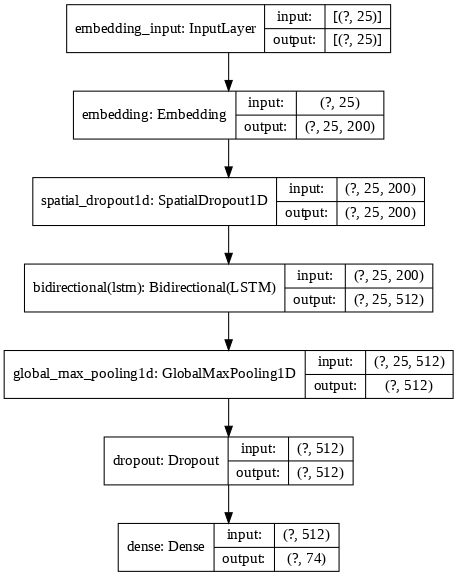

In [0]:
# initiating LSTM model with the best parameter values identified in gridsearch hyperparameter tuning

modelname = 'LSTM'
model = createmodel_LSTM(optimizer='adam',lstm_units=256,sdo=0.1,do=0.2)

# printing the model summary

print('Model Summary -',modelname,end='\n\n')
print(model.summary())

# viewing the model architecure graphically

plot_model(model, to_file= modelname+'.png', show_shapes=True, show_layer_names=True,rankdir='TB', expand_nested=True, dpi=75)

Epoch 1/50

Epoch 00001: val_accuracy improved from -inf to 0.12928, saving model to LSTMwt.h5
212/212 - 4s - loss: 4.3247 - accuracy: 0.0627 - val_loss: 3.7855 - val_accuracy: 0.1293 - lr: 0.0010
Epoch 2/50

Epoch 00002: val_accuracy improved from 0.12928 to 0.14581, saving model to LSTMwt.h5
212/212 - 3s - loss: 3.5216 - accuracy: 0.1971 - val_loss: 3.5526 - val_accuracy: 0.1458 - lr: 0.0010
Epoch 3/50

Epoch 00003: val_accuracy improved from 0.14581 to 0.23967, saving model to LSTMwt.h5
212/212 - 3s - loss: 2.5541 - accuracy: 0.2717 - val_loss: 3.1240 - val_accuracy: 0.2397 - lr: 0.0010
Epoch 4/50

Epoch 00004: val_accuracy improved from 0.23967 to 0.26328, saving model to LSTMwt.h5
212/212 - 3s - loss: 1.6899 - accuracy: 0.3115 - val_loss: 2.8051 - val_accuracy: 0.2633 - lr: 0.0010
Epoch 5/50

Epoch 00005: val_accuracy improved from 0.26328 to 0.30106, saving model to LSTMwt.h5
212/212 - 3s - loss: 1.1249 - accuracy: 0.3876 - val_loss: 2.7071 - val_accuracy: 0.3011 - lr: 0.0010
Epo

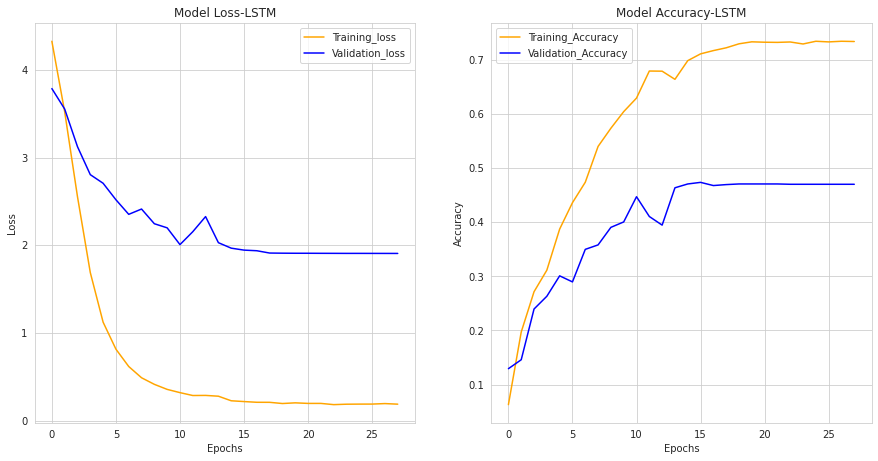

In [0]:
# fitting the LSTM model with callbacks enabled
# callbacks enabled are 

FILENAME = 'LSTMwt.h5'

start_time=time.time()

checkpoint = ModelCheckpoint(FILENAME, monitor="val_accuracy", verbose=1, save_best_only=True,save_weights_only=True, mode="max", save_freq='epoch')
stop = EarlyStopping(monitor="val_loss", patience=PATIENCE, mode="min",min_delta=.01)
reduce_lr = ReduceLROnPlateau(monitor="val_accuracy", factor=0.1, patience=2, min_lr=1e-6, verbose=0, mode="max")

model.fit(X_train, y_train,validation_data=(X_test,y_test),\
          epochs=EPOCHS,batch_size=BATCH_SIZE,verbose=2,\
          class_weight=d_class_weights,callbacks=[stop,checkpoint,reduce_lr])

et=round(time.time()-start_time,2)
print()
print('Model fit completed in',et, 'seconds',end='\n\n')

# printing the graph to visualize the loss and accuracy movement in training and test epoch runs

train_loss=val_loss=train_acc=val_acc=None
train_loss = model.history.history['loss']
val_loss   = model.history.history['val_loss']
train_acc  = model.history.history['accuracy']
val_acc    = model.history.history['val_accuracy']

show_graph(train_loss,val_loss,train_acc,val_acc) 

**Inference**:

1. Optimal value achieved with learning rate of 1e-4  at epoch 16

In [0]:
# evaluating the model ( with the best model saved)

model.load_weights(FILENAME)

# getting prediction values for X_test 

y_pred = model.predict(X_test, verbose=0)
y_pred_1D = np.argmax(y_pred, axis=1)

# evaluating the model (using sklearn metrics)

accuracy_score,recall_score,precision_score,f1_score,mcc = calc_metrices(y_test_1D,y_pred_1D)

# printing key metrics

print('*** Evaluation Results -',modelname,'***',end='\n\n')
print('Test Accuracy  :%0.2f' %(accuracy_score*100),'%',end='\n\n')

# storing the model output in dataframe for comparison purpose

storeresult (modelname,'Class balanced;Tuned',accuracy_score,round(mcc,3),precision_score,recall_score,f1_score)

*** Evaluation Results - LSTM ***

Test Accuracy  :47.40 %



**Inference**:

1. The result based on hyperparameter tuned values is not encouraging
2. The score is below the baseline achieved in the initial submission
3. Hence this model is not appropriate for further analysis

#### **3.1.2 Bidirectional GRU+CNN Classification Model-Tuned**

**Setting up custom functions**:

In [0]:
# creating function to define GRU+CNN model with parameters for tuning
# this function will be called via KerasClassifier to execute gridsearch on hyperparameters  

def createmodel_GRUCNN(optimizer='adam',gru_units=128,sdo=0.4,do=0.1):
  
  # clearing the session and seeding randomness

  clear_session()
  np.random.seed(seed)
  random.set_seed(seed)

  # defining the model

  filter_size = 2
  num_filters = 512

  inputs = Input(shape=(input_length,), dtype='int32')
  embedding = Embedding(input_dim=input_dim,output_dim=output_dim,weights = [embedding_matrix_nn])(inputs)
  sdo_0 = SpatialDropout1D(sdo)(embedding)
  gru_0 = Bidirectional(GRU(gru_units, return_sequences=True))(sdo_0)
  conv_0 = Conv1D(num_filters, kernel_size = filter_size, padding = "valid", kernel_initializer = "he_uniform")(gru_0)
  avg_pool = GlobalAveragePooling1D()(conv_0)
  max_pool = GlobalMaxPooling1D()(conv_0)
  conc = Concatenate(axis=1)([avg_pool, max_pool])
  flatten = Flatten()(conc)
  do_0 = Dropout(do)(flatten)
  output = Dense(units=74, activation='softmax')(do_0)

  model = Model(inputs=inputs, outputs=output)

  model.compile(loss=loss,optimizer=optimizer, metrics=metrics_model) 

  return model

**Architecture explanation**:

1.  Glove embedding matrix is preloaded and trained
2.  Bi-directional GRU layer created and the output is put through 1D Convolution using filter size of 2 and 512 filters created
3.  The results are pooled using average as well as maxpooling method and the pooled results are contatenated and flattened
3.  SpatialDropout and Dropout layers introduced to handle regularization
4.  Softmax layer in the output with 74 units corresponding to 74 classes
5.  Function setup to create model by taking input parameters related to 
>- Optimizer,GRU Units,SpatialDropout value, Dropout value

**Hyperparameter tuning of the model**:

In [0]:
# gridsearch for hyper parameter tuning
# hyperparameters tuned are - Optimizers,GRU Units,Spatialdropout value, Dropout value
# Batchsize is not considered in this and epoch will be optimized using callback during execution
# Learning rate is not considered in this as this will be optimized using callback (reducelr function) during execution
# number of parameter options kept minimum to avoid calculation overhead 

start_time=time.time()
model = KerasClassifier(build_fn=createmodel_GRUCNN,verbose=0,nb_epoch=20,batch_size=32)
optimizers = ['rmsprop', 'adam']
units=[128,256]
sdo= [0.1, 0.4]
do = [0.1, 0.2, 0.4]
param_grid = dict(optimizer=optimizers,gru_units =units, sdo=sdo,do=do)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train,y_train)

# printng the results

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

et=round(time.time()-start_time,2)
print()
print('Model gridsearch completed in',et, 'seconds',end='\n\n')

Best: 0.625573 using {'do': 0.1, 'gru_units': 256, 'optimizer': 'adam', 'sdo': 0.1}
0.581581 (0.025373) with: {'do': 0.1, 'gru_units': 128, 'optimizer': 'rmsprop', 'sdo': 0.1}
0.572426 (0.025790) with: {'do': 0.1, 'gru_units': 128, 'optimizer': 'rmsprop', 'sdo': 0.4}
0.613614 (0.013041) with: {'do': 0.1, 'gru_units': 128, 'optimizer': 'adam', 'sdo': 0.1}
0.600474 (0.013754) with: {'do': 0.1, 'gru_units': 128, 'optimizer': 'adam', 'sdo': 0.4}
0.582170 (0.020761) with: {'do': 0.1, 'gru_units': 256, 'optimizer': 'rmsprop', 'sdo': 0.1}
0.574493 (0.024417) with: {'do': 0.1, 'gru_units': 256, 'optimizer': 'rmsprop', 'sdo': 0.4}
0.625573 (0.010967) with: {'do': 0.1, 'gru_units': 256, 'optimizer': 'adam', 'sdo': 0.1}
0.609777 (0.013482) with: {'do': 0.1, 'gru_units': 256, 'optimizer': 'adam', 'sdo': 0.4}
0.580104 (0.025582) with: {'do': 0.2, 'gru_units': 128, 'optimizer': 'rmsprop', 'sdo': 0.1}
0.569769 (0.027889) with: {'do': 0.2, 'gru_units': 128, 'optimizer': 'rmsprop', 'sdo': 0.4}
0.613170

**Inference**:

1. Most of the score values hover between 0.57 to 0.62
2. adam optimizer gives better result than rmsprop
3. Increase in GRU units resuts in improvement in score
4. Increase in spatialdropout results in decrease in score
5. Increase in dropout results in decrease in score

**Executing the model**:

Model Summary - GRUCNN

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 25)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 25, 200)      1139600     input_1[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d (SpatialDropo (None, 25, 200)      0           embedding[0][0]                  
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 25, 512)      703488      spatial_dropout1d[0][0]          
______________________________________________________________________

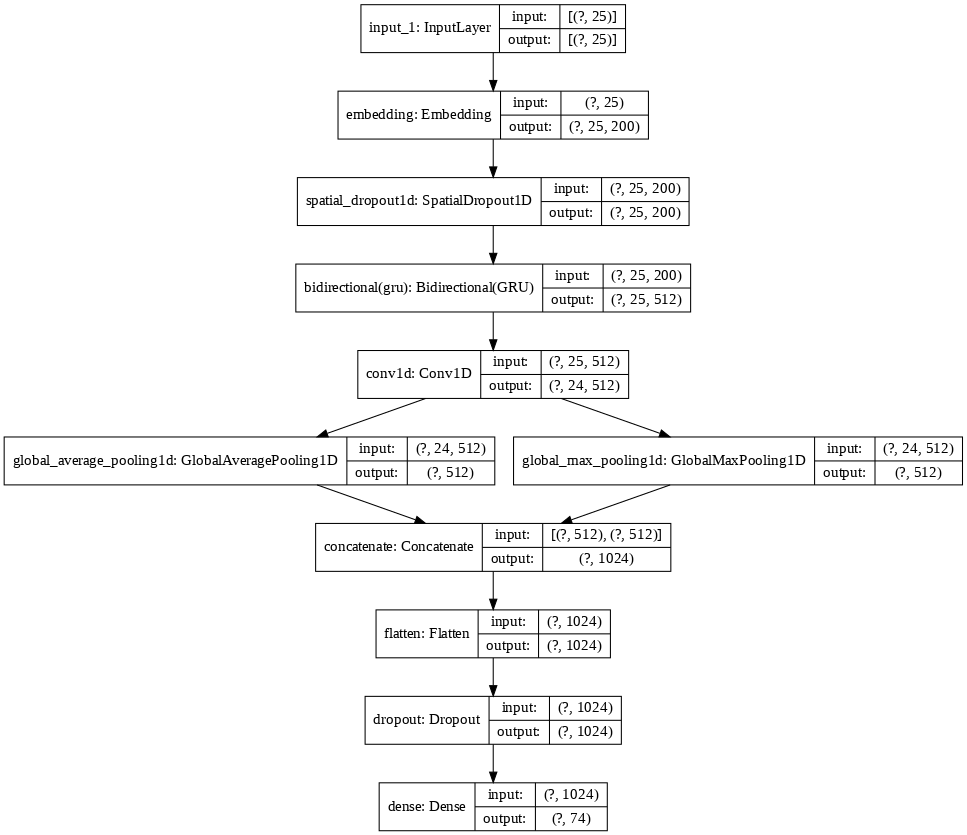

In [0]:
# initiating GRU+CNN model with the best parameter values identified in gridsearch hyperparameter tuning

modelname = 'GRUCNN'
model = createmodel_GRUCNN(optimizer='adam',gru_units=256,sdo=0.1,do=0.1)

# printing the model summary

print('Model Summary -',modelname,end='\n\n')
print(model.summary())

# viewing the model architecure graphically

plot_model(model, to_file= modelname+'.png', show_shapes=True, show_layer_names=True,rankdir='TB', expand_nested=True, dpi=75)

Epoch 1/50

Epoch 00001: val_accuracy improved from -inf to 0.19658, saving model to GRUCNNwt.h5
212/212 - 5s - loss: 4.6061 - accuracy: 0.0865 - val_loss: 3.4804 - val_accuracy: 0.1966 - lr: 0.0010
Epoch 2/50

Epoch 00002: val_accuracy did not improve from 0.19658
212/212 - 4s - loss: 2.9426 - accuracy: 0.2291 - val_loss: 3.6533 - val_accuracy: 0.1694 - lr: 0.0010
Epoch 3/50

Epoch 00003: val_accuracy improved from 0.19658 to 0.21015, saving model to GRUCNNwt.h5
212/212 - 4s - loss: 1.6997 - accuracy: 0.3328 - val_loss: 3.5015 - val_accuracy: 0.2102 - lr: 0.0010
Epoch 4/50

Epoch 00004: val_accuracy improved from 0.21015 to 0.39433, saving model to GRUCNNwt.h5
212/212 - 4s - loss: 0.9810 - accuracy: 0.4161 - val_loss: 2.3463 - val_accuracy: 0.3943 - lr: 0.0010
Epoch 5/50

Epoch 00005: val_accuracy did not improve from 0.39433
212/212 - 3s - loss: 0.6843 - accuracy: 0.5082 - val_loss: 3.1209 - val_accuracy: 0.3099 - lr: 0.0010
Epoch 6/50

Epoch 00006: val_accuracy improved from 0.39433

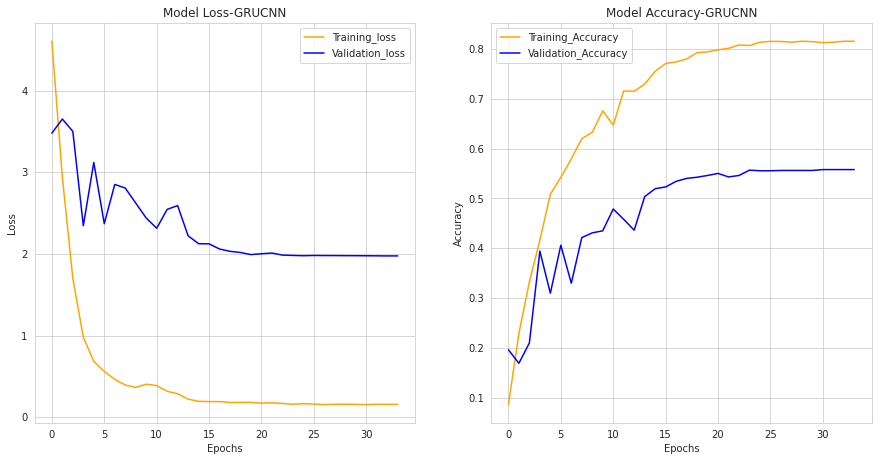

In [0]:
# fitting the model with callbacks enabled

FILENAME = 'GRUCNNwt.h5'

start_time=time.time()

checkpoint = ModelCheckpoint(FILENAME, monitor="val_accuracy", verbose=1, save_best_only=True,save_weights_only=True, mode="max", save_freq='epoch')
stop = EarlyStopping(monitor="val_loss", patience=PATIENCE, mode="min",min_delta=.01)
reduce_lr = ReduceLROnPlateau(monitor="val_accuracy", factor=0.1, patience=2, min_lr=1e-6, verbose=0, mode="max")

model.fit(X_train, y_train,validation_data=(X_test,y_test),\
          epochs=EPOCHS,batch_size=BATCH_SIZE,verbose=2,\
          class_weight=d_class_weights,callbacks=[stop,checkpoint,reduce_lr])

et=round(time.time()-start_time,2)
print()
print('Model fit completed in',et, 'seconds',end='\n\n')

# printing the graph to visualize the loss and accuracy movement in training and test epoch runs

train_loss=val_loss=train_acc=val_acc=None
train_loss = model.history.history['loss']
val_loss   = model.history.history['val_loss']
train_acc  = model.history.history['accuracy']
val_acc    = model.history.history['val_accuracy']

show_graph(train_loss,val_loss,train_acc,val_acc) 

**Inference**:

1. Optimal value achieved with learning rate of 1e-6  at epoch 31

In [0]:
# evaluating the model ( with the best model saved)

model.load_weights(FILENAME)

# getting prediction values for X_test 

y_pred = model.predict(X_test, verbose=0)
y_pred_1D = np.argmax(y_pred, axis=1)

# evaluating the model (using sklearn metrics)

accuracy_score,recall_score,precision_score,f1_score,mcc = calc_metrices(y_test_1D,y_pred_1D)

# printing key metrics

print('*** Evaluation Results -',modelname,'***',end='\n\n')
print('Test Accuracy  :%0.2f' %(accuracy_score*100),'%',end='\n\n')

# storing the model output in dataframe for comparison purpose

storeresult (modelname,'Class balanced;Tuned',accuracy_score,round(mcc,3),precision_score,recall_score,f1_score)

*** Evaluation Results - GRUCNN ***

Test Accuracy  :55.79 %



**Inference**:

1. The result based on hyperparameter tuned values is not encouraging
2. Though GRUCNN has scored better than LSTM, the score is below the baseline achieved in the initial submission
3. Hence this model is not appropriate for further analysis

## **3.2 Models based on Contextualized Word embedding and Document embedding using FastAI/Flair**

**Approach to Hyperparameter tuning**:

1. Models are executed for each value of the hyperparameter selected and the output is recorded offline and reproduced for comparative analysis purpose
2. Hence the results of various iterations is not printed as part of the model output
3. The final hyperparameter selected is used and full model is executed and results printed in output in the notebook
3. Hyperparameters selected for tuning are - Learningrate, epoch,momentum and batchsize
4. Number of parameter options kept minimum to avoid calculation overhead


### **3.2.1 ULMFIT Model**

 **Organize data**

In [0]:
# Re-organizing data ( This is required for both Contextualized based embedding model & Ulmfit model )

df = pd.DataFrame({'label':mydata.Group, 'text':mydata.Description})

# check few records 
df.head()

label                                               text
0      0  login issue verified details employee manager ...
1      0  outlook team meetings skype appearing calendar...
2      0                                     cannot log vpn
3      0                         unable access hr tool page
4      0                                        skype error

**Create train & validation datasets and FastAI data bunch**

In [0]:
# split data into training and validation set

df_trn, df_val = train_test_split(df, stratify = df['label'], test_size = 0.4, random_state = 12)

In [0]:
# checking the results

df_trn.shape, df_val.shape

((5080, 2), (3387, 2))

**FAST AI Data Bunch:**

Before proceeding further, we’ll need to prepare our data for the language model and for the classification model separately. This can be done quite easily using the fastai library:

In [0]:
# Language model data
data_lm = TextLMDataBunch.from_df(train_df = df_trn, valid_df = df_val, path = "")

# Classifier model data
data_clas = TextClasDataBunch.from_df(path = "", train_df = df_trn, valid_df = df_val, vocab=data_lm.train_ds.vocab, bs=32)

**Create a Base Language Model**

> We will use the data_lm object we created earlier to     fine-tune a pre-trained language model. fast.ai has an English model with an AWD-LSTM architecture available that we can download. We can create a learner object that will directly create a model, download the pretrained weights and be ready for fine-tuning.



In [0]:
# Base Language Model.

learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5)


"""
Note:

> data_lm is the language model data bunch
> AWD-LSTM is the model architecture
> drop_multi is the drop-out.

The Language model used is given by arch and config. It can be:

an AWD_LSTM(Merity et al.)
a Transformer decoder (Vaswani et al.)
a TransformerXL (Dai et al.)

They each have a default config for language modelling that is in {lower_case_class_name}\_lm\_config if you want to change the default parameter. 
At this stage, only the AWD LSTM and Tranformer support pretrained=True but we hope to add more pretrained models soon. 
drop_mult is applied to all the dropouts weights of the config, learn_kwargs are passed to the Learner initialization.

If your data is backward, the pretrained model downloaded will also be a backward one (only available for AWD_LSTM).

"""

'\nNote:\n\n> data_lm is the language model data bunch\n> AWD-LSTM is the model architecture\n> drop_multi is the drop-out.\n\nThe Language model used is given by arch and config. It can be:\n\nan AWD_LSTM(Merity et al.)\na Transformer decoder (Vaswani et al.)\na TransformerXL (Dai et al.)\n\nThey each have a default config for language modelling that is in {lower_case_class_name}\\_lm\\_config if you want to change the default parameter. \nAt this stage, only the AWD LSTM and Tranformer support pretrained=True but we hope to add more pretrained models soon. \ndrop_mult is applied to all the dropouts weights of the config, learn_kwargs are passed to the Learner initialization.\n\nIf your data is backward, the pretrained model downloaded will also be a backward one (only available for AWD_LSTM).\n\n'

**Train and Fine tune the Base Language Model**

**Learning Rate Finder**

Learning rate finder plots lr vs loss relationship for a Learner. The idea is to reduce the amount of guesswork on picking a good starting learning rate.

**Overview:**

First run lr_find learn.lr_find()
Plot the learning rate vs loss learn.recorder.plot()
Pick a learning rate before it diverges then start training
Technical Details: (first described by Leslie Smith)

Train Learner over a few iterations. Start with a very low start_lr and change it at each mini-batch until it reaches a very high end_lr. Recorder will record the loss at each iteration. Plot those losses against the learning rate to find the optimal value before it diverges.

**Suggested LR**

If you pass **suggestion=True** in learn.recorder.plot, you will see the point where the gardient is the steepest with a
red dot on the graph. We can use that point as a first guess for an LR.

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.20E-01
Min loss divided by 10: 1.32E-01


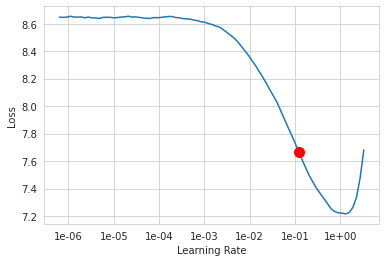

In [0]:
learn.lr_find()
learn.recorder.plot(suggestion=True)
min_grad_lr = learn.recorder.min_grad_lr

**Fine-tuning a language model**

In [0]:
# train the learner object with learning rate = 1e-01
learn.fit_one_cycle(1, min_grad_lr)

We will save this encoder to use it for classification later

In [0]:
learn.save_encoder('ft_enc')

**Use the Language Model to Train the Text Classifier**

Let’s now use the data_clas object we created earlier to build a classifier with our fine-tuned encoder.

In [0]:
# Creating Classifier Object
learn = text_classifier_learner(data_clas,AWD_LSTM,drop_mult=0.7)

# Add weights of finetuned Language model
learn.load_encoder('ft_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (5080 items)
x: TextList
xxbos erp access issue system hrp enter i d having xxunk xxunk transaction code needs working with describe no authorization open employee idoc getting authorized message recreate condition then nsu attach result ticketing tool ticket provide same as,xxbos erp password reset,xxbos material complaints shipped dfrt going into normal bin having issue with materials coming locations plant very often they but go as printed transfer order xxunk place them our examples delivery complaint could check why does location automatically assign les team,xxbos attendance tool loading internet explorer missing adobe flash player,xxbos password reset
y: CategoryList
2,0,18,19,0
Path: .;

Valid: LabelList (3387 items)
x: TextList
xxbos call hold xxunk playing side disconnected,xxbos trying access crm through ess but getting message password has expired tried management tool manager unlocked all accounts rebooted pc again,xxbos

In [0]:
# Check one batch

data_clas.show_batch()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.63E-01
Min loss divided by 10: 4.37E-02


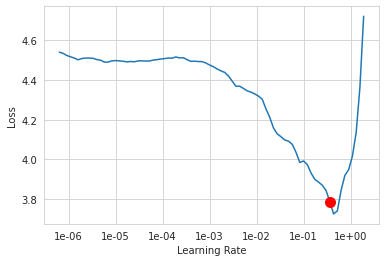

In [0]:
# find the optimal learning rate to start with

learn.lr_find()
learn.recorder.plot(suggestion=True)
min_grad_lr = learn.recorder.min_grad_lr

We will again try to fit our model.

In [0]:
learn.fit_one_cycle(1, min_grad_lr)

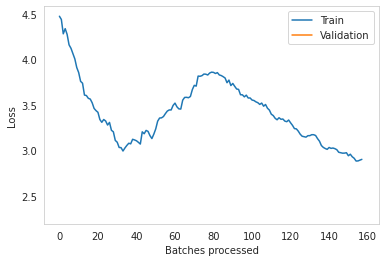

In [0]:
learn.recorder.plot_losses()

**Fine Tune Text Classifier Model**

**Discriminative fine-tuning:**

The Main Idea is: As different layers capture different types of information, they should be fine-tuned to different extents. Instead of using the same learning rate for all layers of the model, discriminative fine-tuning allows us to tune each layer with different learning rates. In the orginal paper, the authors suggest first to finetune only the last layer, and then unfreeze all the layers with a learning rate lowered by a factor of 2.6.

> Freeze everything except the last two layers and fine-tune it.

In [0]:
learn.freeze_to(-2)

learn.fit_one_cycle(4, slice(5e-3/2, 2e-3), moms=(0.8,0.7))

#learn.fit_one_cycle(1, slice(5e-3/2, 2e-3))

Displaying the result of all hyper parameter tunings done for reporting purpose. The parameter with better values is highlighted in yellow.The actual metric result may vary with the run values  due to randomness

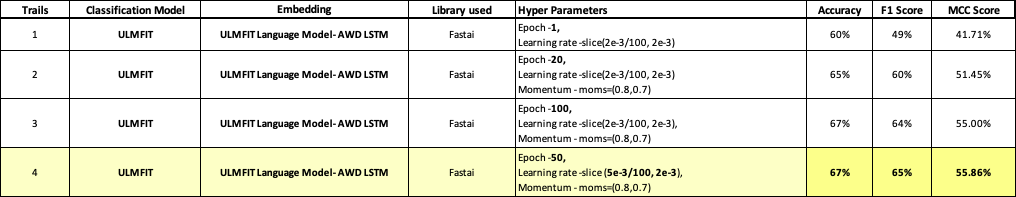

In [0]:
learn.unfreeze()

# learn.fit_one_cycle(1, slice(2e-3/100, 2e-3)) # Initial model

# learn.fit_one_cycle(20, slice(2e-3/100, 2e-3), moms=(0.8,0.7)) # Second Model

# learn.fit_one_cycle(100, slice(2e-3/100, 2e-3), moms=(0.8,0.7)) # Third Model

learn.fit_one_cycle(50, slice(5e-3/100, 2e-3), moms=(0.8,0.7)) # Final Selected Model

**Analyzing the results**

In [0]:
# get predictions
preds, targets = learn.get_preds()

predictions = np.argmax(preds, axis = 1)


# evaluating the model (using sklearn metrics)

accuracy_score,recall_score,precision_score,f1_score,mcc = calc_metrices(targets,predictions)

print('\n MCC Score:', mcc)
print('\n Accuracy Score:', accuracy_score)
print('\n F1 Score:', f1_score)


 MCC Score: 0.5443064132197587

 Accuracy Score: 0.6607617360496014

 F1 Score: 0.637434807469812


In [0]:
# storing the model output in dataframe for comparison purpose

storeresult ('ULMFIT','ULMFIT Language model-AWD LSTM',accuracy_score,round(mcc,3),precision_score,recall_score,f1_score)

### **3.2.2 Transformer Models - Document Embedded**

> implementing dynamic Contextualized Word Embedding using Flair Library and Custom Text Classifier

Note: To train a custom text classifier [flair.nn.Model (based on RNN)] using Flair library for contextualised Embeddings we need a labelled dataset. Flair’s classification dataset format is based on the Facebook’s FastText format. The format requires one or multiple labels to be defined at the beginning of each line starting with the prefix label.

**Re-structure Dataset**

In [0]:
# Re-organizing data ( This is required for both Contextualized based embedding model & Ulmfit model )

data = pd.DataFrame({'label':mydata.Group, 'text':mydata.Description})

data['label'] = '__label__' + data['label'].astype(str)

# 1.2 Split into Train, Dev,& Test (Note: Ratio selected 70 train :20 dev :10 test)

data.iloc[0:int(len(data)*0.7)].to_csv('train.csv', sep='\t', index = False, header = False)
data.iloc[int(len(data)*0.7):int(len(data)*0.8)].to_csv('test.csv', sep='\t', index = False, header = False)
data.iloc[int(len(data)*0.8):].to_csv('dev.csv', sep='\t', index = False, header = False);

# Check few records from newly formed data

data.head()

label                                               text
0  __label__0  login issue verified details employee manager ...
1  __label__0  outlook team meetings skype appearing calendar...
2  __label__0                                     cannot log vpn
3  __label__0                         unable access hr tool page
4  __label__0                                        skype error

**Get Corpus & Create label dictionary**

In [0]:
# 2.1 Get the corpus
corpus = ClassificationCorpus(Path('/content/drive/My Drive/AIML/Projects/Capstone'), test_file='test.csv', dev_file='dev.csv', train_file='train.csv')
stats = corpus.obtain_statistics()
print(stats)

# 2.2 create the label dictionary
label_dict = corpus.make_label_dictionary()

2020-06-02 04:29:38,252 Reading data from /content/drive/My Drive/AIML/Projects/Capstone
2020-06-02 04:29:38,253 Train: /content/drive/My Drive/AIML/Projects/Capstone/train.csv
2020-06-02 04:29:38,254 Dev: /content/drive/My Drive/AIML/Projects/Capstone/dev.csv
2020-06-02 04:29:38,255 Test: /content/drive/My Drive/AIML/Projects/Capstone/test.csv
{
    "TRAIN": {
        "dataset": "TRAIN",
        "total_number_of_documents": 5888,
        "number_of_documents_per_class": {
            "0": 2796,
            "1": 22,
            "3": 140,
            "4": 62,
            "5": 99,
            "6": 109,
            "7": 47,
            "8": 466,
            "9": 181,
            "10": 114,
            "11": 17,
            "12": 163,
            "13": 104,
            "14": 80,
            "15": 27,
            "16": 67,
            "17": 62,
            "18": 63,
            "19": 147,
            "2": 174,
            "20": 22,
            "21": 21,
            "22": 19,
            "23

100%|██████████| 6734/6734 [00:03<00:00, 1974.78it/s]

2020-06-02 04:29:46,691 [b'0', b'1', b'3', b'4', b'5', b'6', b'7', b'8', b'9', b'10', b'11', b'12', b'13', b'14', b'15', b'16', b'17', b'18', b'19', b'2', b'20', b'21', b'22', b'23', b'24', b'25', b'26', b'27', b'28', b'29', b'30', b'31', b'33', b'34', b'35', b'36', b'37', b'38', b'39', b'40', b'41', b'42', b'43', b'44', b'45', b'46', b'47', b'49', b'50', b'51', b'52', b'53', b'54', b'55', b'56', b'57', b'58', b'59', b'60', b'61', b'32', b'62', b'63', b'64', b'48', b'65', b'66', b'67', b'68', b'69', b'70']


**Initialise Transformer based Embedding**

* using Flair Document embeddings*

**Document embeddings:**
There are three main document embeddings in Flair: 

(1) DocumentPoolEmbeddings that simply do an average over all word embeddings in the sentence, 

(2) DocumentRNNEmbeddings that train an RNN over all word embeddings in a sentence, and 

(3) TransformerDocumentEmbeddings that use a pre-trained transformer

We will be using the third one i.e TransformerDocument Embedding for our classification problem

In [0]:
# initialize transformer document embeddings (document embedding is a pre-trained transformer)

document_embeddings_bert = TransformerDocumentEmbeddings('bert-base-uncased', fine_tune=True)

document_embeddings_albert = TransformerDocumentEmbeddings('albert-base-v1', fine_tune=True)


**Build and Train Custom Classifier Model**
(flair.nn.Model - RNN based)

#### **3.2.2.1 BERT Model - Transformer Docment Embedded**

In [0]:
# 1.1 create the text classifier

classifier_bert_doc = TextClassifier(document_embeddings_bert, label_dictionary=label_dict)


# 1.2 initialize the text classifier trainer 
trainer_bert_doc = ModelTrainer(classifier_bert_doc, corpus,optimizer=Adam)

# 1.3 start the training
trainer_bert_doc.train('./',
              learning_rate=3e-5, # use very small learning rate
              mini_batch_size=16,
              mini_batch_chunk_size=4, # optionally set this if transformer is too much for your machine
              patience=3,
              max_epochs=10 # terminate after 10 epochs
              )

2020-06-02 04:32:49,455 ----------------------------------------------------------------------------------------------------
2020-06-02 04:32:49,460 Model: "TextClassifier(
  (document_embeddings): TransformerDocumentEmbeddings(
    (model): BertModel(
      (embeddings): BertEmbeddings(
        (word_embeddings): Embedding(30522, 768, padding_idx=0)
        (position_embeddings): Embedding(512, 768)
        (token_type_embeddings): Embedding(2, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (encoder): BertEncoder(
        (layer): ModuleList(
          (0): BertLayer(
            (attention): BertAttention(
              (self): BertSelfAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias=True)
               

{'dev_loss_history': [1.6869488954544067,
  1.5202182531356812,
  1.4818198680877686,
  1.6288973093032837,
  1.7756953239440918,
  1.925908088684082,
  2.121382474899292,
  2.0822386741638184,
  2.1952080726623535,
  2.3744394779205322],
 'dev_score_history': [0.9884039513703279,
  0.9889066702415564,
  0.9895602047741535,
  0.9893256026342468,
  0.9893088453385392,
  0.9898785933925983,
  0.9893088453385392,
  0.9896607485483992,
  0.9901467101239202,
  0.9896942631398145],
 'test_score': 0.9909765924150101,
 'train_loss_history': [1.8116470542938814,
  1.168204738394074,
  0.7384983649396378,
  0.5131504888767782,
  0.32070617037622823,
  0.24395096415410872,
  0.18882323509973029,
  0.1890311654171218,
  0.17977368734453036,
  0.17768298915546873]}

#### **3.2.2.2 ALBERT Model - Transformer Docment Embedded**

In [0]:
# 2.1 create the text classifier

classifier_albert_doc = TextClassifier(document_embeddings_albert, label_dictionary=label_dict)


# 2.2 initialize the text classifier trainer 
trainer_albert_doc = ModelTrainer(classifier_albert_doc, corpus,optimizer=Adam)

# 2.3 start the training
trainer_albert_doc.train('./',
              learning_rate=3e-5, # use very small learning rate
              mini_batch_size=16,
              mini_batch_chunk_size=4, # optionally set this if transformer is too much for your machine
              patience=3,
              max_epochs=10 # terminate after 10 epochs
              )

2020-06-02 05:31:19,120 ----------------------------------------------------------------------------------------------------
2020-06-02 05:31:19,123 Model: "TextClassifier(
  (document_embeddings): TransformerDocumentEmbeddings(
    (model): AlbertModel(
      (embeddings): AlbertEmbeddings(
        (word_embeddings): Embedding(30000, 128, padding_idx=0)
        (position_embeddings): Embedding(512, 128)
        (token_type_embeddings): Embedding(2, 128)
        (LayerNorm): LayerNorm((128,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (encoder): AlbertTransformer(
        (embedding_hidden_mapping_in): Linear(in_features=128, out_features=768, bias=True)
        (albert_layer_groups): ModuleList(
          (0): AlbertLayerGroup(
            (albert_layers): ModuleList(
              (0): AlbertLayer(
                (full_layer_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
                (attention): AlbertAt

{'dev_loss_history': [1.958594560623169,
  1.6614128351211548,
  1.5909337997436523,
  1.6259506940841675,
  1.5876843929290771,
  1.6028242111206055,
  1.7416367530822754,
  1.8230524063110352,
  1.9347033500671387,
  1.9692535400390625],
 'dev_score_history': [0.9876833876549003,
  0.9883871940746203,
  0.9886553108059422,
  0.987783931429146,
  0.9891580296771707,
  0.9891412723814631,
  0.9890742431986326,
  0.9885380097359888,
  0.9894764182956155,
  0.9888563983544335],
 'test_score': 0.9899776912063397,
 'train_loss_history': [1.9641620296499003,
  1.386370395836623,
  1.1521310228044572,
  0.8999850813137449,
  0.654958355685939,
  0.537913867474898,
  0.4305822499420332,
  0.32629429808129434,
  0.2878725024993005,
  0.227841653091752]}

**Analyze Results - Model Comparison**

Displaying the result of all hyper parameter tunings done for reporting purpose. The parameter with better values is highlighted in yellow.The actual metric result may vary with the run values  due to randomness

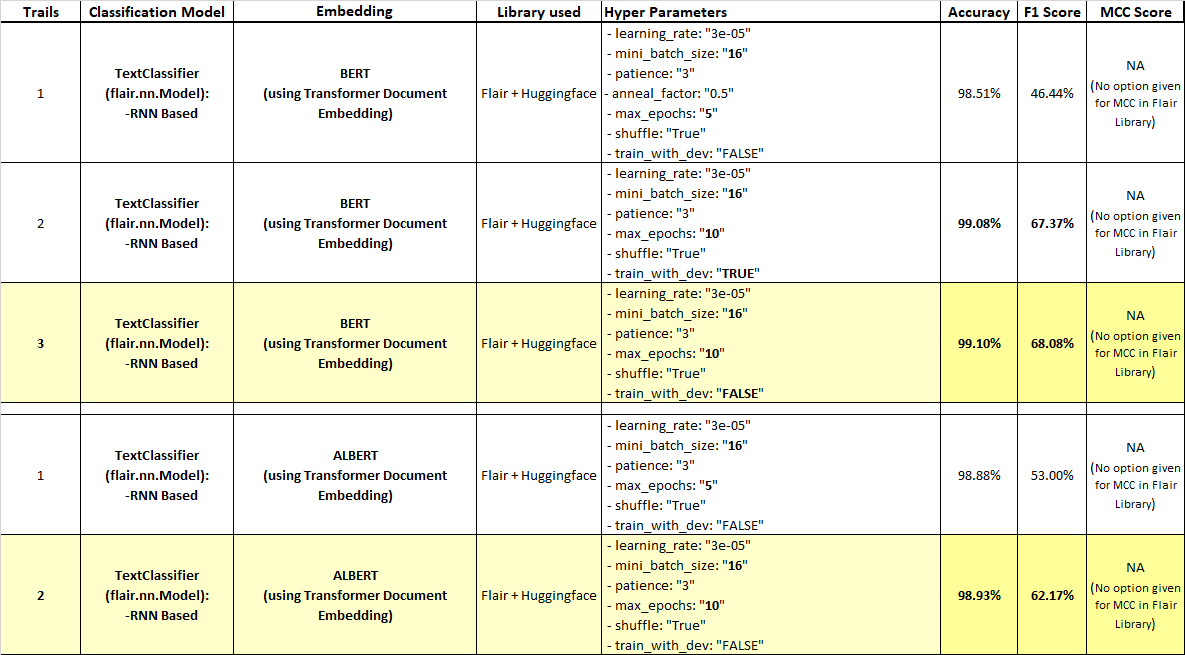

**Wt.Avg.Metrics for BERT (Transformer document embedding)**

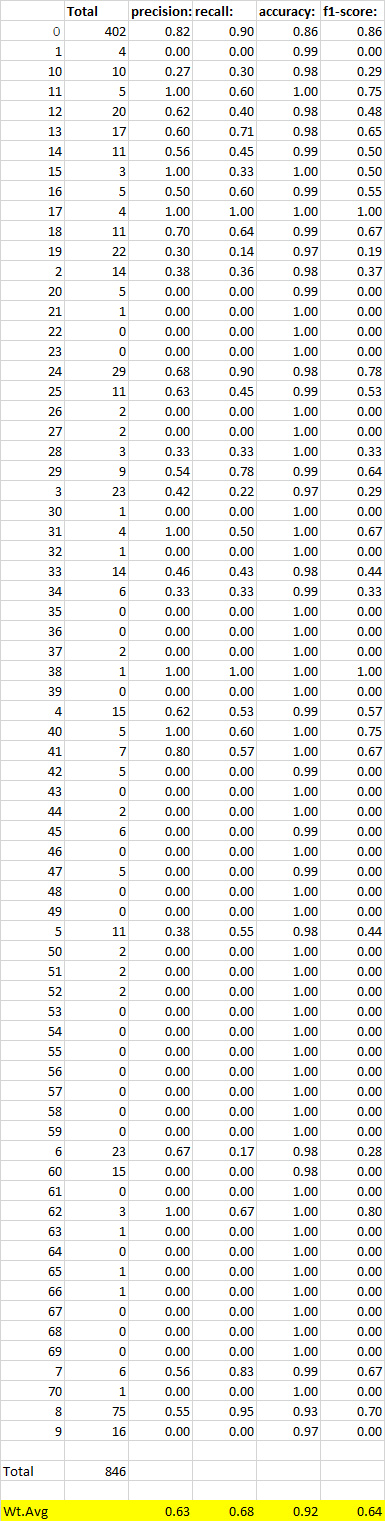

**Wt.Avg.Metrics for ALBERT (Transformer document embedding)**

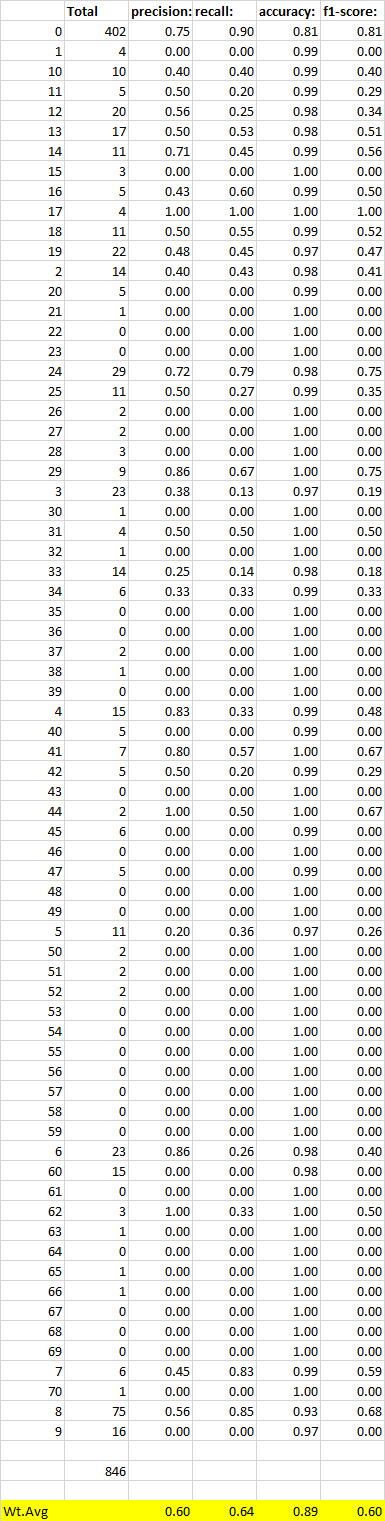

## **3.3 Models based on Transformers**

**Approach to Hyperparameter tuning**:

1. Models are executed for each value of the hyperparameter selected and the output is recorded offline and reproduced for comparative analysis purpose
2. Hence the results of various iterations is not printed as part of the model output
3. The final hyperparameter selected is used and full model is executed and results printed in output in the notebook
4. Hyperparameters selected for tuning are - Learningrate, weight decay and batchsize
5. Epoch is not considered for tuning as it  will be optimized using callback during execution
6. Number of parameter options kept minimum to avoid calculation overhead

**Setting up data  and custom functions for transformer models**:

In [0]:
# preparating dataframe with appropriate column names as the input data to the transformer model is expected in specific format

mydata_tm = mydata.copy(deep=True)
mydata_tm.rename(columns={"Description": "text", "Group": "labels"},inplace=True)
y = tf.keras.utils.to_categorical(mydata_tm['labels'])
mydata_tm['labels'] = mydata_tm['labels'].astype('int64')

# creating train and test dataframes

train_df, eval_df,y_train,y_test = train_test_split(mydata_tm,y,test_size=tt_split,random_state=tt_seed)

print('train_df dataset shape:',train_df.shape)
print('eval_df dataset shape:',eval_df.shape)
print('y_train dataset shape:',y_train.shape)
print('y_test dataset shape:',y_test.shape)

train_df dataset shape: (6773, 2)
eval_df dataset shape: (1694, 2)
y_train dataset shape: (6773, 74)
y_test dataset shape: (1694, 74)


In [0]:
# creating class weight for handling class imbalance issue 

y_train_lst=train_df.values[:,1]
class_weights_tm = class_weight.compute_class_weight('balanced', np.unique(y_train_lst), y_train_lst)
class_weights_lst = class_weights_tm.tolist()
class_weights_dc = dict(enumerate(class_weights_tm))

print(class_weights_lst)

[0.028782083970763216, 3.661081081081081, 0.46936936936936935, 0.5684908510995468, 1.1585699623674308, 0.8800675675675675, 0.6101801801801802, 1.7946475887652358, 0.17204328388538914, 0.44647330257086354, 0.832063882063882, 3.661081081081081, 0.45763513513513515, 0.7890260950605779, 0.9948589894242068, 2.9524847428073233, 1.5254504504504505, 1.3660750302541347, 1.2712087087087087, 0.5580916282135794, 3.1561043802423114, 3.9794359576968272, 4.817211948790896, 4.817211948790896, 0.3911411411411411, 0.9948589894242068, 1.8305405405405406, 5.7204391891891895, 2.408605974395448, 1.2368517165814463, 5.084834834834835, 1.6057373162636321, 30.50900900900901, 1.0767885532591415, 1.664127764127764, 45.763513513513516, 6.537644787644788, 7.04054054054054, 30.50900900900901, 6.101801801801802, 2.615057915057915, 3.1561043802423114, 2.9524847428073233, 22.881756756756758, 7.627252252252252, 3.1561043802423114, 22.881756756756758, 4.817211948790896, 18.305405405405406, 22.881756756756758, 8.32063882

In [0]:
# creating function to generate evaluation metrics

def f1_multiclass(labels, preds):
    return metrics.f1_score(labels, preds, average='weighted')

def prec_multiclass(labels, preds):
    return metrics.precision_score(labels, preds, average='weighted')

def rec_multiclass(labels, preds):
    return metrics.recall_score(labels, preds, average='weighted') 

def acc_score(labels, preds):
    return metrics.accuracy_score(labels, preds) 

In [0]:
# creating function to create,train and evaluate transformer models based on input parameters


def cte_transformermodels(model_type,model_name,train_df,eval_df,lr,wd,batch_size):

  sample_size = len(train_df)
  steps = round(sample_size/batch_size)

  train_args = {
    'manual_seed': seed,
    'output_dir': f"outputs/{model_type}",
    'best_model_dir': f"outputs/{model_type}/best_model",    
    'max_seq_length': 128,
    'num_train_epochs': 10,
    'train_batch_size': batch_size,
    'eval_batch_size': batch_size,
    'do_lower_case':True,
    'gradient_accumulation_steps': 1,
    'learning_rate': lr,
    'weight_decay': wd,
    'adam_epsilon': 1e-8,    
    'evaluate_during_training': True,
    'evaluate_during_training_steps': steps,
    'save_eval_checkpoints': False,
    'save_steps': 50000,            
    'reprocess_input_data': True,
    'save_model_every_epoch': False,
    'overwrite_output_dir': True,
    'no_cache': True,
    'use_early_stopping': True,
    'early_stopping_consider_epochs': True, 
    'early_stopping_metric':'mcc',
    'early_stopping_metric_minimize':False,
    'early_stopping_delta': 0.01,
    'early_stopping_patience': 3,
    }

  # Create the model

  model = ClassificationModel(model_type, model_name, num_labels=74,  weight=class_weights_lst,args=train_args,use_cuda=True)
  
  # Train the model

  model.train_model(train_df, eval_df=eval_df,show_running_loss=True,f1=f1_multiclass,prec=prec_multiclass,rec=rec_multiclass, acc=acc_score)
  
  # Evaluate the model

  result, model_outputs, _ = model.eval_model(eval_df, f1=f1_multiclass,prec=prec_multiclass,rec=rec_multiclass, acc=acc_score)

  return result

In [0]:
# creating function to load the best model trained and saved in best model directory and evaluate 

def evalbm_transformermodels(model_type,bmpath,eval_df,batch_size):

  train_args = {
    'manual_seed': seed,
    'output_dir': f"outputs/{model_type}",
    'best_model_dir': f"outputs/{model_type}/best_model",    
    'eval_batch_size': batch_size,
    'overwrite_output_dir': True,
    'no_cache': True
    }

  # Create the model

  model = ClassificationModel(model_type, bmpath, num_labels=74,  weight=class_weights_lst,args=train_args,use_cuda=True)
  
  # Evaluate the model

  result, model_outputs, _ = model.eval_model(eval_df, f1=f1_multiclass,prec=prec_multiclass,rec=rec_multiclass, acc=acc_score)

  return result,model_outputs

In [0]:
# creating function to load the best model trained and saved in best model directory and evaluate 

def pred_transformermodels(model_type,bmpath,df):

  train_args = {
    'manual_seed': seed,
    'output_dir': f"outputs/{model_type}",
    'best_model_dir': f"outputs/{model_type}/best_model",    
    'overwrite_output_dir': True,
    'no_cache': True
    }

  # Create the model

  model = ClassificationModel(model_type, bmpath, num_labels=74,  weight=class_weights_lst,args=train_args,use_cuda=True)
  
  # Evaluate the model

  preds, pred_outputs = model.predict(df)

  return preds, pred_outputs

#### **3.3.1 BERT Classification Model - Tuned**

**Executing the model**

In [0]:
# executing BERT classification model with the optimal hyperparameter selected 

start_time=time.time()
bert_result = cte_transformermodels('bert', 'bert-base-uncased',train_df,eval_df,lr=4e-5,wd=0.09,batch_size=8)
et=round(time.time()-start_time,2)
print('Model fit completed in',et, 'seconds',end='\n\n') 

# loading best model for evaluation

bert_bmresult,bert_eval_preds_output= evalbm_transformermodels('bert', 'outputs/bert/best_model',eval_df,batch_size=8)

# printing key metrics

print('*** Evaluation Results - Best Model BERT ***',end='\n\n')
print("\n".join("{}\t{:0.3}".format(k, v) for k, v in bert_bmresult.items()))

# storing the model output in dataframe for comparison purpose

storeresult('BERT','Class balanced;Tuned',round(bert_bmresult["acc"],3),round(bert_bmresult["mcc"],3),\
            round(bert_bmresult["prec"],3),round(bert_bmresult["rec"],3),round(bert_bmresult["f1"],3))



Selected optimization level O1:  Insert automatic casts around Pytorch functions and Tensor methods.

Defaults for this optimization level are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic
Processing user overrides (additional kwargs that are not None)...
After processing overrides, optimization options are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic


Running loss: 4.631352Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 32768.0
Running loss: 4.136792Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0
Running loss: 4.213722Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 8192.0
Running loss: 4.383076Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 4096.0
Running loss: 3.592401


Running loss: 1.893056


Running loss: 2.120512Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 4096.0
Running loss: 2.558574


Running loss: 0.299033


Running loss: 1.125095


Running loss: 1.899827Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 4096.0
Running loss: 0.060702


Running loss: 0.016239


Running loss: 0.077710



Model fit completed in 1794.47 seconds




*** Evaluation Results - Best Model BERT ***

mcc	0.57
f1	0.664
prec	0.672
rec	0.675
acc	0.675
eval_loss	2.72


**Analysing the results**

In [0]:
# loading all  BERT model tuning results for comparison

bert_tuning_results = pd.read_excel('BERT_Tuning_results.xlsx',sheet_name='Sheet1', index_col=None, header=0)

# displaying comparative metrics of all tuning options evaluated so far - highest value for a metric highlighted in yellow

bert_tuning_results.style.set_table_styles([dict(selector='th',props=[('text-align','center')])]).hide_index()\
                    .highlight_max(axis=0)\
                    .format("{:.2%}",subset=['Accuracy','Precision','Recall','F1'])

**Inference**:

1. Accuracy,MCC,Precision,Recall and F1 values are compared for each iteration of hyperparameter selection
2. The baseline value ( interim submission) is also shown along side for better comparison 
3. Increase in Learning rate resuts in improvement in Accuracy,MCC,Recall and F1 but Precision score drops
4. Increase in Weight decay resuts in improvement in Accuracy,MCC,Recall and F1 but Precision score drops but this is only up to certain point. Beyond certain point increase is not giving the desired results
5. Increase in Batchsize results in drop in values for all metrics
6. Optimal parameter is selected where F1 and MCC are the highest

In [0]:
# saving the best parameter tuned values for slope plot comparison purpose

best_param_index = 5
score_list=['Accuracy','MCC','F1']

for s in score_list:
  storehptcomp('BERT',s,bert_tuning_results.iloc[0][s],bert_tuning_results.iloc[best_param_index][s])
slopeplot_df["color"] = slopeplot_df.apply(lambda row: "green" if row["After Tuning"] >= row["Before Tuning"] else "red", axis = 1)

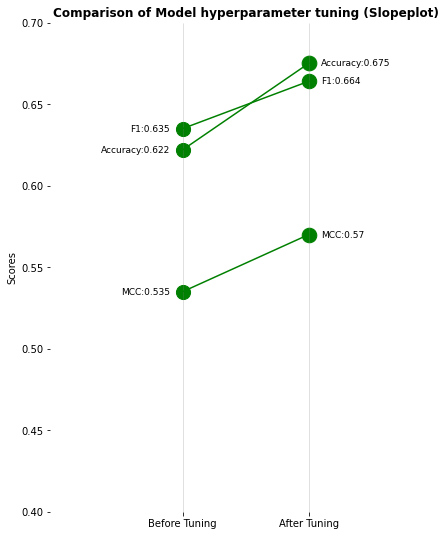

In [0]:
# comparative view of hyperparameter tuning impact on model key scores ( Accuracy, MCC and F1) - for BERT model

show_slopeplot(slopeplot_df[slopeplot_df.Model=='BERT'].drop(['Model'],axis=1))

**Inference**:

1. As can be seen visually, hyperparameter tuning has resulted in increase in the values of MCC, Accuracy and F1 ( green color reflects increase)

#### **3.3.2 XLNet Classification Model - Tuned**

**Executing the model**

In [0]:
# executing XLNet classification model with the optimal hyperparameter selected 

start_time=time.time()
xlnet_result = cte_transformermodels('xlnet', 'xlnet-base-cased',train_df,eval_df,lr=3e-5,wd=0,batch_size=16)
et=round(time.time()-start_time,2)
print('Model fit completed in',et, 'seconds',end='\n\n') 

# loading best model for evaluation

xlnet_bmresult,xlnet_eval_preds_output= evalbm_transformermodels('xlnet', 'outputs/xlnet/best_model',eval_df,batch_size=16)

# printing key metrics

print('*** Evaluation Results - Best Model XLNet ***',end='\n\n')
print("\n".join("{}\t{:0.3}".format(k, v) for k, v in xlnet_bmresult.items()))

# storing the model output in dataframe for comparison purpose

storeresult('XLNet','Class balanced;Tuned',round(xlnet_bmresult["acc"],3),round(xlnet_bmresult["mcc"],3),\
            round(xlnet_bmresult["prec"],3),round(xlnet_bmresult["rec"],3),round(xlnet_bmresult["f1"],3))



Selected optimization level O1:  Insert automatic casts around Pytorch functions and Tensor methods.

Defaults for this optimization level are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic
Processing user overrides (additional kwargs that are not None)...
After processing overrides, optimization options are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic


Running loss: 3.932112Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 32768.0
Running loss: 4.317065Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0
Running loss: 4.494619Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 8192.0
Running loss: 4.167806Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 4096.0
Running loss: 6.049720


Running loss: 2.079095


Running loss: 2.144923


Running loss: 1.908247


Running loss: 0.410406


Running loss: 0.254520


Running loss: 2.985950


Running loss: 0.537135Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 4096.0
Running loss: 0.011399


Running loss: 0.021062


Running loss: 0.006697




Model fit completed in 2205.18 seconds




*** Evaluation Results - Best Model XLNet ***

mcc	0.561
f1	0.658
prec	0.674
rec	0.674
acc	0.674
eval_loss	3.08


**Analysing the results**

In [0]:
# loading all  XLNet model tuning results for comparison

xlnet_tuning_results = pd.read_excel('XLNet_Tuning_results.xlsx',sheet_name='Sheet1', index_col=None, header=0)

# displaying comparative metrics of all tuning options evaluated so far - highest value for a metric highlighted in yellow

xlnet_tuning_results.style.set_table_styles([dict(selector='th',props=[('text-align','center')])]).hide_index()\
                    .highlight_max(axis=0)\
                    .format("{:.2%}",subset=['Accuracy','Precision','Recall','F1'])

**Inference**:

1. Accuracy,MCC,Precision,Recall and F1 values are compared for each iteration of hyperparameter selection
2. The baseline value ( interim submission) is also shown along side for better comparison 
3. Increase in Learning rate resuts in drop in Accuracy,MCC,Recall and F1 but Precision score increases up to a point and then drops
4. Increase in Weight decay resuts in improvement in Accuracy,MCC,Recall and F1 but Precision score drops but this is only up to certain point. Beyond certain point increase is not giving the desired results
5. Increase in Batchsize shows improvement in all metrics except precision but beyond certain point increase is not giving desired results
6. Optimal parameter is selected where F1 and MCC are the highest

In [0]:
# saving the best parameter tuned values for slope plot comparison purpose - for XLNet model

best_param_index = 3
score_list=['Accuracy','MCC','F1']
for s in score_list:
  storehptcomp('XLNet',s,xlnet_tuning_results.iloc[0][s],xlnet_tuning_results.iloc[best_param_index][s])
slopeplot_df["color"] = slopeplot_df.apply(lambda row: "green" if row["After Tuning"] >= row["Before Tuning"] else "red", axis = 1)

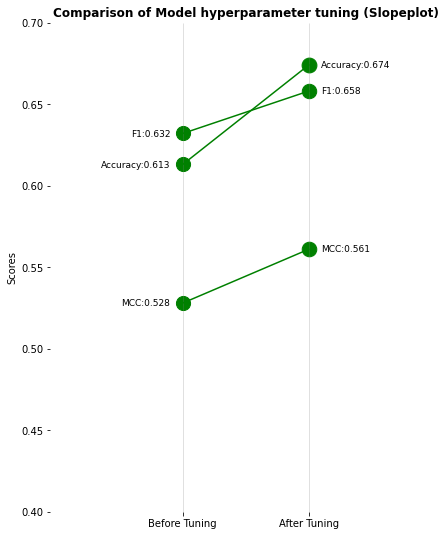

In [0]:
# comparative view of hyperparameter tuning impact on model key scores ( Accuracy, MCC and F1) - for XLNet model

show_slopeplot(slopeplot_df[slopeplot_df.Model=='XLNet'].drop(['Model'],axis=1))

**Inference**:

1. As can be seen visually, hyperparameter tuning has resulted in increase in the values of MCC, Accuracy and F1 ( green color reflects increase)

#### **3.3.3 ELECTRA Classification Model - Tuned**

**Executing the model**

In [0]:
# executing ELECTRA classification model with the optimal hyperparameter selected 

start_time=time.time()
electra_result = cte_transformermodels('electra', 'google/electra-base-discriminator',train_df,eval_df,lr=4e-5,wd=0,batch_size=16)
et=round(time.time()-start_time,2)
print('Model fit completed in',et, 'seconds',end='\n\n') 


# loading best model for evaluation

electra_bmresult,electra_eval_preds_output= evalbm_transformermodels('electra', 'outputs/electra/best_model',eval_df,batch_size=16)

# printing key metrics

print('*** Evaluation Results - Best Model ELECTRA ***',end='\n\n')
print("\n".join("{}\t{:0.3}".format(k, v) for k, v in electra_bmresult.items()))

# storing the model output in dataframe for comparison purpose

storeresult('ELECTRA','Class balanced;Tuned',round(electra_bmresult["acc"],3),round(electra_bmresult["mcc"],3),\
            round(electra_bmresult["prec"],3),round(electra_bmresult["rec"],3),round(electra_bmresult["f1"],3))



Selected optimization level O1:  Insert automatic casts around Pytorch functions and Tensor methods.

Defaults for this optimization level are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic
Processing user overrides (additional kwargs that are not None)...
After processing overrides, optimization options are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic


Running loss: 4.387395Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 32768.0
Running loss: 4.309056Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0
Running loss: 2.715928


Running loss: 2.867057


Running loss: 3.118768


Running loss: 3.716166


Running loss: 1.186994


Running loss: 3.635361Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0
Running loss: 1.013078


Running loss: 0.710521


Running loss: 0.280783


Running loss: 0.168283


Running loss: 0.475425




Model fit completed in 1765.52 seconds




*** Evaluation Results - Best Model ELECTRA ***

mcc	0.543
f1	0.65
prec	0.679
rec	0.646
acc	0.646
eval_loss	2.64


**Analysing the results**

In [0]:
# loading all  ELECTRA model tuning results for comparison

electra_tuning_results = pd.read_excel('Electra_Tuning_results.xlsx',sheet_name='Sheet1', index_col=None, header=0)

# displaying comparative metrics of all tuning options evaluated so far - highest value for a metric highlighted in yellow

electra_tuning_results.style.set_table_styles([dict(selector='th',props=[('text-align','center')])]).hide_index()\
                    .highlight_max(axis=0)\
                    .format("{:.2%}",subset=['Accuracy','Precision','Recall','F1'])

**Inference**:

1. Accuracy,MCC,Precision,Recall and F1 values are compared for each iteration of hyperparameter selection
2. The baseline value ( interim submission) is also shown along side for better comparison 
3. Increase in Learning rate resuts in improvement in all scores but beyond certain point the scores drop
4. Increase in Weight decy resuts in improvement in all scores but beyond certain point the scores drop
5. Increase in Batchsize results  in improvement in all scores but beyond certain point the scores drop
6. Optimal parameter is selected where F1 and MCC are the highest

In [0]:
# saving the best parameter tuned values for slope plot comparison purpose - for ELECTRA model

best_param_index = 3
score_list=['Accuracy','MCC','F1']
for s in score_list:
  storehptcomp('ELECTRA',s,electra_tuning_results.iloc[0][s],electra_tuning_results.iloc[best_param_index][s])
slopeplot_df["color"] = slopeplot_df.apply(lambda row: "green" if row["After Tuning"] >= row["Before Tuning"] else "red", axis = 1)

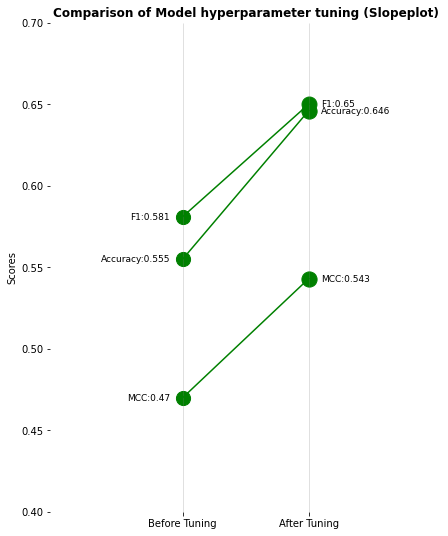

In [0]:
# comparative view of hyperparameter tuning impact on model key scores ( Accuracy, MCC and F1) - for ELECTRA model

show_slopeplot(slopeplot_df[slopeplot_df.Model=='ELECTRA'].drop(['Model'],axis=1))

**Inference**:

1. As can be seen visually, hyperparameter tuning has resulted in increase in the values of MCC, Accuracy and F1 ( green color reflects increase)

#### **3.3.4 RoBERTa Classification Model-Tuned**

**Executing the model**

In [0]:
# executing RoBERTa classification model with the optimal hyperparameter selected 

start_time=time.time()
roberta_result = cte_transformermodels('roberta', 'roberta-base',train_df,eval_df,lr=4e-5,wd=0.1,batch_size=16)
et=round(time.time()-start_time,2)
print('Model fit completed in',et, 'seconds',end='\n\n') 


# loading best model for evaluation

roberta_bmresult,roberta_eval_preds_output= evalbm_transformermodels('roberta', 'outputs/roberta/best_model',eval_df,batch_size=16)

# printing key metrics

print('*** Evaluation Results - Best Model RoBERTa ***',end='\n\n')
print("\n".join("{}\t{:0.3}".format(k, v) for k, v in roberta_bmresult.items()))

# storing the model output in dataframe for comparison purpose

storeresult('RoBERTa','Class balanced;Tuned',round(roberta_bmresult["acc"],3),round(roberta_bmresult["mcc"],3),\
            round(roberta_bmresult["prec"],3),round(roberta_bmresult["rec"],3),round(roberta_bmresult["f1"],3))



Selected optimization level O1:  Insert automatic casts around Pytorch functions and Tensor methods.

Defaults for this optimization level are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic
Processing user overrides (additional kwargs that are not None)...
After processing overrides, optimization options are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic


Running loss: 4.669580Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 32768.0
Running loss: 4.068460Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0
Running loss: 2.680562


Running loss: 1.442487


Running loss: 1.947382Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 8192.0
Running loss: 2.986261


Running loss: 1.095242


Running loss: 1.714373


Running loss: 0.759123


Running loss: 0.116953


Running loss: 0.191343


Running loss: 0.053695


Running loss: 0.533557




Model fit completed in 1877.67 seconds




*** Evaluation Results - Best Model RoBERTa ***

mcc	0.538
f1	0.646
prec	0.67
rec	0.651
acc	0.651
eval_loss	2.96



Selected optimization level O1:  Insert automatic casts around Pytorch functions and Tensor methods.

Defaults for this optimization level are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic
Processing user overrides (additional kwargs that are not None)...
After processing overrides, optimization options are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic


Running loss: 4.669580Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 32768.0
Running loss: 4.068460Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0
Running loss: 2.680562


Running loss: 1.442487


Running loss: 1.947382Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 8192.0
Running loss: 2.986261


Running loss: 1.095242


Running loss: 1.714373


Running loss: 0.759123


Running loss: 0.116953


Running loss: 0.191343


Running loss: 0.053695


Running loss: 0.533557




Model fit completed in 1877.67 seconds




*** Evaluation Results - Best Model RoBERTa ***

mcc	0.538
f1	0.646
prec	0.67
rec	0.651
acc	0.651
eval_loss	2.96


**Analysing the results**

In [0]:
# loading all  RoBERTa model tuning results for comparison

RoBERTa_tuning_results = pd.read_excel('RoBERTa_Tuning_results.xlsx',sheet_name='Sheet1', index_col=None, header=0)

# displaying comparative metrics of all tuning options evaluated so far - highest value for a metric highlighted in yellow

RoBERTa_tuning_results.style.set_table_styles([dict(selector='th',props=[('text-align','center')])]).hide_index()\
                    .highlight_max(axis=0)\
                    .format("{:.2%}",subset=['Accuracy','Precision','Recall','F1'])

**Inference**:

1. Accuracy,MCC,Precision,Recall and F1 values are compared for each iteration of hyperparameter selection
2. The baseline value ( interim submission) is also shown along side for better comparison 
3. Increase in Learning rate resuts in drop in all scores except precision but beyond certain point that also drops
4. Increase in Weight decy resuts in drop in all scores but beyond a certain point there is improvement in scores
5. Increase in Batchsize results  in improvement in all scores except precision
6. Optimal parameter is selected where F1 and MCC are the highest ( in this case parameter with highest F1 has only marginally lower MCC and hence highest F1 is selected)

In [0]:
# saving the best parameter tuned values for slope plot comparison purpose - for RoBERTa model

best_param_index = 5
score_list=['Accuracy','MCC','F1']
for s in score_list:
  storehptcomp('RoBERTa',s,RoBERTa_tuning_results.iloc[0][s],RoBERTa_tuning_results.iloc[best_param_index][s])
slopeplot_df["color"] = slopeplot_df.apply(lambda row: "green" if row["After Tuning"] >= row["Before Tuning"] else "red", axis = 1)

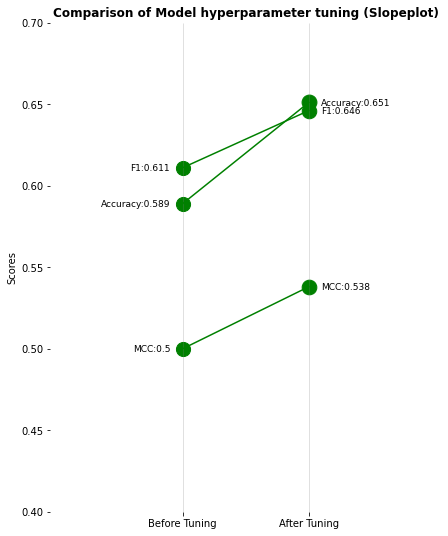

In [0]:
# comparative view of hyperparameter tuning impact on model key scores ( Accuracy, MCC and F1) - for RoBERTa model

show_slopeplot(slopeplot_df[slopeplot_df.Model=='RoBERTa'].drop(['Model'],axis=1))

**Inference**:

1. As can be seen visually, hyperparameter tuning has resulted in increase in the values of MCC, Accuracy and F1 ( green color reflects increase)

## **3.4 Models based on Stacking**

**Architecture explanation**:

1. Custom stacking method is adopted
2. The output from the 4 transformer models are taken as input for this and on top of this multiple metaclassifier model alternatives are evaluated
3. Stacking a neural network as metaclassifier on top of transformer model outputs -- referred to as Stacking NN model
4. Stacking a SVC as metaclassifier on top of transformer model outputs -- referred to as Stacking SVC model
5. Stacking a Randomforest as metaclassifier on top of transformer model outputs -- referred to as Stacking RF model
6. The advantages of this approach is that this while this benefits from the architecture supriority of state of the art transformers ( 4 variants combined) , it also leverages the advantages of stacking as well as advantages associated with final metaclassifier( neural network or classic SVC) to produce superior results

### **3.4.1 Stacking Classification - NN as Metaclassifier**

**Approach to Hyperparameter tuning**:

1. Models are executed for each value of the hyperparameter selected and the output is recorded offline and reproduced for comparative analysis purpose
2. Hence the results of various iterations is not printed as part of the model output
3. The final hyperparameter selected is used and full model is executed and results printed in output in the notebook
4. Hyperparameters selected for tuning are - Batchsize, Dense Layer units,Dropout
5. Epoch is not considered for tuning as it  will be optimized using callback during execution
6. Learning rate is not consiered for tuning as this is be optimized duing callback using reducelr function
7. Number of parameter options kept minimum to avoid calculation overhead

**Setting up data and custom functions**

In [0]:
# get output of transformer models to generate training data for stacking

bert_train_preds,bert_train_preds_output = pred_transformermodels('bert', 'outputs/bert/best_model',train_df['text'])
xlnet_train_preds,xlnet_train_preds_output = pred_transformermodels('xlnet', 'outputs/xlnet/best_model',train_df['text'])
electra_train_preds,electra_train_preds_output = pred_transformermodels('electra', 'outputs/electra/best_model',train_df['text'])
roberta_train_preds,roberta_train_preds_output = pred_transformermodels('roberta', 'outputs/roberta/best_model',train_df['text'])

# get y train and y test in 1D array
y_train_1D = np.argmax(y_train, axis=1)
y_test_1D = np.argmax(y_test, axis=1)

In [0]:
# common parameters for the model

EPOCHS = 50
BATCH_SIZE = 32
PATIENCE = 20
FILENAME='stackingnn_modelwt.h5'

Model Summary -  Stacking NN

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
bert_output (InputLayer)        [(None, 74)]         0                                            
__________________________________________________________________________________________________
xlnet_output (InputLayer)       [(None, 74)]         0                                            
__________________________________________________________________________________________________
electra_output (InputLayer)     [(None, 74)]         0                                            
__________________________________________________________________________________________________
roberta_output (InputLayer)     [(None, 74)]         0                                            
________________________________________________________________

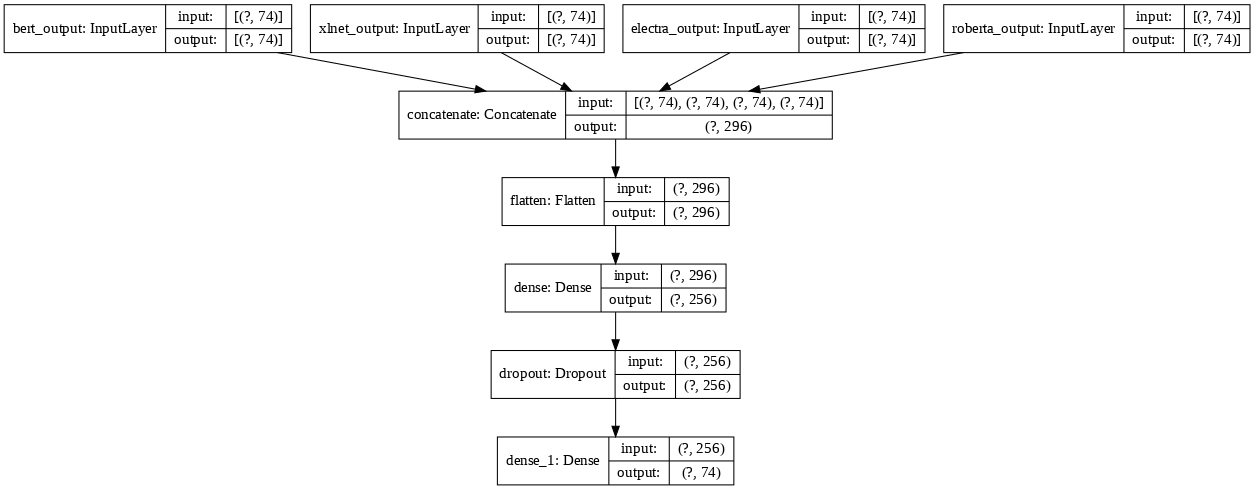

In [0]:
# defining stacking model ( based on neural network)

# clearing the session and seeding randomness

clear_session()
np.random.seed(seed)
random.set_seed(seed)

# defining the model

bert_trp_out = Input(shape=(74,), dtype='int32', name='bert_output')
xlnet_trp_out = Input(shape=(74,), dtype='int32', name='xlnet_output')
electra_trp_out = Input(shape=(74,), dtype='int32', name='electra_output')
roberta_trp_out = Input(shape=(74,), dtype='int32', name='roberta_output')       
merge = Concatenate(axis=1)([bert_trp_out,xlnet_trp_out,electra_trp_out,roberta_trp_out])
flatten = Flatten()(merge)
hidden = Dense(256, activation='relu')(flatten)
dropout = Dropout(0.8)(hidden)
output = Dense(74, activation='softmax')(dropout)
model = Model(inputs=[bert_trp_out,xlnet_trp_out,electra_trp_out,roberta_trp_out], outputs=output)

optimizer = Adam(learning_rate=1e-3, beta_1=0.9, beta_2=0.999, epsilon=None, amsgrad=True)
loss = 'categorical_crossentropy'
metrics_model='accuracy'
model.compile(loss=loss,optimizer=optimizer, metrics=metrics_model) 

# printing the model summary

modelname = 'Stacking NN'

print('Model Summary - ',modelname,end='\n\n')
print(model.summary())

# viewing the model architecure visually

plot_model(model, to_file=modelname+'.png', show_shapes=True, show_layer_names=True,rankdir='TB', expand_nested=True, dpi=75)

**Architecture explanation**:

1. As seen above visually, the 4 trasformer model outputs are given as input to this stacking model
2. The values are concatenated and flattened to be fed to relu layer
3. Dropout is applied on relu output and is given to softmax layer for generating output
4. For training this model, output of training data from transformer models is fed as input along with appropriate y train values and NN metaclassifier is trained based on this
5. For evaluating this model, out of evaluation data from transformer models is fed as input along with appropriate y test values and NN metaclassifier is evaluated based on this

**Executing the model**

In [0]:
# fitting the model with callbacks- stacking classification based on neural network

start_time=time.time()

checkpoint = ModelCheckpoint(FILENAME, monitor="val_accuracy", verbose=1, save_best_only=True,save_weights_only=True, mode="max", save_freq='epoch')
stop = EarlyStopping(monitor="val_loss", patience=PATIENCE, mode="min",min_delta=.01)
reduce_lr = ReduceLROnPlateau(monitor="val_accuracy", factor=0.1, patience=5, min_lr=1e-6, verbose=0, mode="max")

model.fit([bert_train_preds_output,xlnet_train_preds_output,electra_train_preds_output,roberta_train_preds_output], y_train,\
          validation_data=([bert_eval_preds_output,xlnet_eval_preds_output,electra_eval_preds_output,roberta_eval_preds_output],y_test),\
           shuffle=True,epochs=EPOCHS,batch_size=BATCH_SIZE,verbose=2,class_weight=class_weights_dc,\
          callbacks=[stop,checkpoint,reduce_lr])

et=round(time.time()-start_time,2)
print()
print('Model fit completed in',et, 'seconds',end='\n\n')

# loading the best model weights for evaluation

model.load_weights(FILENAME)
score, acc = model.evaluate([bert_eval_preds_output,xlnet_eval_preds_output,electra_eval_preds_output,roberta_eval_preds_output], y_test,\
                            batch_size=BATCH_SIZE,verbose=0)


# getting prediction values for X_test 

y_pred = model.predict([bert_eval_preds_output,xlnet_eval_preds_output,electra_eval_preds_output,roberta_eval_preds_output], verbose=0)
y_pred_1D = np.argmax(y_pred, axis=1)


# evaluating the model (using sklearn metrics)

accuracy_score,recall_score,precision_score,f1_score,mcc = calc_metrices(y_test_1D,y_pred_1D)

# printing key metrics

print('*** Evaluation Results -',modelname,'***',end='\n\n')
print('Test Accuracy  :%0.2f' %(acc*100),'%',end='\n\n')

# storing the model output in dataframe for comparison purpose

storeresult (modelname,'Class balanced;Tuned',round(accuracy_score,3),round(mcc,3),round(precision_score,3),round(recall_score,3),round(f1_score,3)) 

Epoch 1/50

Epoch 00001: val_accuracy improved from -inf to 0.67355, saving model to stackingnn_modelwt.h5
212/212 - 1s - loss: 3.9042 - accuracy: 0.5306 - val_loss: 1.4135 - val_accuracy: 0.6736 - lr: 0.0010
Epoch 2/50

Epoch 00002: val_accuracy did not improve from 0.67355
212/212 - 1s - loss: 1.8988 - accuracy: 0.7651 - val_loss: 1.6219 - val_accuracy: 0.6718 - lr: 0.0010
Epoch 3/50

Epoch 00003: val_accuracy improved from 0.67355 to 0.67414, saving model to stackingnn_modelwt.h5
212/212 - 1s - loss: 1.3049 - accuracy: 0.7986 - val_loss: 1.6818 - val_accuracy: 0.6741 - lr: 0.0010
Epoch 4/50

Epoch 00004: val_accuracy improved from 0.67414 to 0.67532, saving model to stackingnn_modelwt.h5
212/212 - 1s - loss: 1.1125 - accuracy: 0.8165 - val_loss: 1.7821 - val_accuracy: 0.6753 - lr: 0.0010
Epoch 5/50

Epoch 00005: val_accuracy improved from 0.67532 to 0.67710, saving model to stackingnn_modelwt.h5
212/212 - 1s - loss: 0.6263 - accuracy: 0.8504 - val_loss: 1.8190 - val_accuracy: 0.6771

**Inference**:

1. Optimal learning rate is 1e-3 and epoch is 21

**Analysing the results**

In [0]:
# loading all  Stacking NN model tuning results for comparison

stackingnn_tuning_results = pd.read_excel('StackingNN_Tuning_results.xlsx',sheet_name='Sheet1', index_col=None, header=0)

# displaying comparative metrics of all tuning options evaluated so far - highest value for a metric highlighted in yellow

stackingnn_tuning_results.style.set_table_styles([dict(selector='th',props=[('text-align','center')])]).hide_index()\
                    .highlight_max(axis=0)\
                    .format("{:.2%}",subset=['Accuracy','Precision','Recall','F1'])

**Inference**:

1. Accuracy,MCC,Precision,Recall and F1 values are compared for each iteration of hyperparameter selection
2. Increase in Batchsize results  in drop in accuracy and recall. MCC and F1 shows improvement but only up to certain point.
3. Increase in dense layer improves all parameters but again only up to certain point beyond which values drop
4. Optimal parameter is selected where F1 and MCC are the highest

In [0]:
# saving the best parameter tuned values for slope plot comparison purpose - for Stacking NN model

best_param_index = 3
score_list=['Accuracy','MCC','F1']
for s in score_list:
  storehptcomp('Stacking NN',s,StackingNN_tuning_results.iloc[0][s],StackingNN_tuning_results.iloc[best_param_index][s])
slopeplot_df["color"] = slopeplot_df.apply(lambda row: "green" if row["After Tuning"] >= row["Before Tuning"] else "red", axis = 1)

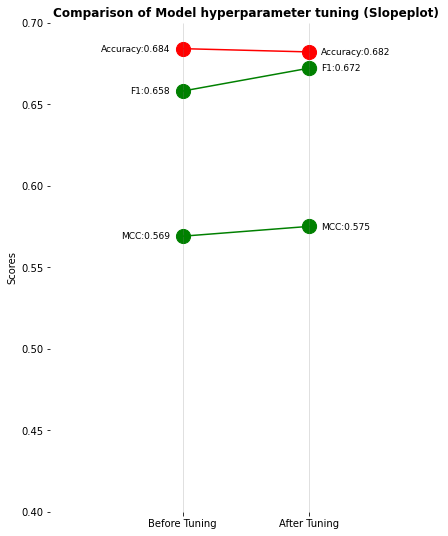

In [0]:
# comparative view of hyperparameter tuning impact on model key scores ( Accuracy, MCC and F1) - for Stacking NN model

show_slopeplot(slopeplot_df[slopeplot_df.Model=='Stacking NN'].drop(['Model'],axis=1))

**Inference**:

1. As can be seen visually, hyperparameter tuning has resulted in increase in the values of MCC,F1 and not accuracy ( green color reflects increase)

### **3.4.2 Stacking Classification - SVC as Metaclassifier**

**Approach to Hyperparameter tuning**:

1. Gridsearch is used for tuning hyperparameters
2. The results of various iterations is printed as output for analysis
3. Hyperparameters selected for tuning are - C and gamma
4. Number of parameter options kept minimum to avoid calculation overhead


**Setting up data and custom functions**

In [0]:
# concatenating the transformer model training prediction and evaluation outputs to create X_train_stkd and X_test_stkd respectively

X_train_stkd = np.concatenate((bert_train_preds_output,xlnet_train_preds_output,electra_train_preds_output,roberta_train_preds_output),axis=1)
X_test_stkd = np.concatenate((bert_eval_preds_output,xlnet_eval_preds_output,electra_eval_preds_output,roberta_eval_preds_output),axis=1)

# checking the shape of the output

print(X_train_stkd.shape)
print(X_test_stkd.shape)

(6773, 296)
(1694, 296)


In [0]:
# common parameters 

n_jobs=4
scoring='accuracy'
cv=3

**Hyperparameter tuning of the model**

In [0]:
# stacking SVC hyper parameter tuning

param_grid={'gamma':(0.1,0.01,0.001,0.0001,0.00001),'C':(1,10,100,1000,10000)}
estimator=SVC(kernel='rbf',random_state = seed,class_weight='balanced')
svc_t = GridSearchCV(estimator=estimator,param_grid=param_grid,cv=cv,n_jobs=n_jobs,scoring=scoring)
start_time=time.time() 
svc_t.fit(X_train_stkd, y_train_1D.ravel())
y_predict = svc_t.predict(X_test_stkd)
print('Best parameter for Stacked SVC is',svc_t.best_params_)
print('Best estimator for Stacked SVC is',svc_t.best_estimator_)
print('Best score for Stacked SVC is',svc_t.best_score_)
svc_t_means = svc_t.cv_results_['mean_test_score']
svc_t_stds = svc_t.cv_results_['std_test_score']
for mean,std,params in zip(svc_t_means,svc_t_stds,svc_t.cv_results_['params']):
    print("%0.3f(+/-%0.03f) for %r"%(mean,std*2,params))
et=round(time.time()-start_time,2)
print('Stacked SVC hyperparameter tuning completed in',et, 'seconds')

Best parameter for SVC is {'C': 1, 'gamma': 0.001}
Best estimator for SVC is SVC(C=1, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=99, shrinking=True, tol=0.001,
    verbose=False)
Best score for SVC is 0.9165827169718616
0.743(+/-0.029) for {'C': 1, 'gamma': 0.1}
0.912(+/-0.019) for {'C': 1, 'gamma': 0.01}
0.917(+/-0.021) for {'C': 1, 'gamma': 0.001}
0.910(+/-0.025) for {'C': 1, 'gamma': 0.0001}
0.428(+/-0.287) for {'C': 1, 'gamma': 1e-05}
0.743(+/-0.020) for {'C': 10, 'gamma': 0.1}
0.909(+/-0.015) for {'C': 10, 'gamma': 0.01}
0.916(+/-0.013) for {'C': 10, 'gamma': 0.001}
0.916(+/-0.022) for {'C': 10, 'gamma': 0.0001}
0.911(+/-0.024) for {'C': 10, 'gamma': 1e-05}
0.742(+/-0.020) for {'C': 100, 'gamma': 0.1}
0.908(+/-0.015) for {'C': 100, 'gamma': 0.01}
0.916(+/-0.013) for {'C': 100, 'gamma': 0.001}
0.915(+/-0.014) for {'C': 100, 'gamma': 0.0

**Inference**:

1. Inrease in C reduces the score
2. Decrease in gamma improves the score but only up to certain point afterwhich the score drops

**Executing the model**

In [0]:
# defining model - Stacking classification based on SVC with optimal parameters 

modelname='Stacking SVC'

#setting up run parameters

kernel = 'rbf'

# defining the model

start_time=time.time()
model = SVC(kernel=kernel, random_state = seed,class_weight='balanced',C= 1, gamma= 0.001)
model.fit(X_train_stkd, y_train_1D.ravel()) 
et=round(time.time()-start_time,2)
print('Model fit completed in',et, 'seconds',end='\n\n') 

# getting prediction values for X_test 

y_predict = model.predict(X_test_stkd)

# evaluating the model (using sklearn metrics)

accuracy_score,recall_score,precision_score,f1_score,mcc = calc_metrices(y_test_1D,y_predict)

# printing key metrics

print('*** Evaluation Results -',modelname,'***',end='\n\n')
print('Test Accuracy  :%0.2f' %(accuracy_score*100),'%',end='\n\n')

# storing the model output in dataframe for comparison purpose

storeresult (modelname,'Class balanced;Tuned',accuracy_score,round(mcc,3),precision_score,recall_score,f1_score)

Model fit completed in 15.26 seconds

*** Evaluation Results - Stacking SVC ***

Test Accuracy  :66.53 %



**Analysing the results**

1. Parameter tuning has given improved accuracy

### **3.4.3 Stacking Classification - RF as Metaclassifier**

**Approach to Hyperparameter tuning**:

1. Gridsearch is used for tuning hyperparameters
2. The results of various iterations is printed as output for analysis
3. Hyperparameters selected for tuning is n_estimators
4. Number of parameter options kept minimum to avoid calculation overhead

**Hyperparameter tuning of the model**

In [0]:
# common parameters 

n_jobs=4
scoring = 'accuracy'
cv=3

In [0]:
# stacking RF hyper parameter tuning

param_grid={"n_estimators": [5,10,50,100]}
estimator=RandomForestClassifier(random_state=seed,class_weight='balanced')
rf_t = GridSearchCV(estimator=estimator,param_grid=param_grid,cv=cv,n_jobs=n_jobs,scoring=scoring)
start_time=time.time() 
rf_t.fit(X_train_stkd, y_train_1D.ravel())
y_predict = rf_t.predict(X_test_stkd)
print('Best parameter for Stacking RF is',rf_t.best_params_)
print('Best estimator for Stacking RF is',rf_t.best_estimator_)
print('Best score for Stacking RF is',rf_t.best_score_)
rf_t_means = rf_t.cv_results_['mean_test_score']
rf_t_stds = rf_t.cv_results_['std_test_score']
for mean,std,params in zip(rf_t_means,rf_t_stds,rf_t.cv_results_['params']):
    print("Mean:%0.3f(+/-%0.03f) for %r"%(mean,std*2,params))
et=round(time.time()-start_time,2)
print('Stacking RF hyperparameter tuning completed in',et, 'seconds') 

Best parameter for Stacking RF is {'n_estimators': 10}
Best estimator for Stacking RF is RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=99, verbose=0,
                       warm_start=False)
Best score for Stacking RF is 0.9193862508779235
Mean:0.917(+/-0.015) for {'n_estimators': 5}
Mean:0.919(+/-0.016) for {'n_estimators': 10}
Mean:0.915(+/-0.013) for {'n_estimators': 50}
Mean:0.915(+/-0.012) for {'n_estimators': 100}
Stacking RF hyperparameter tuning completed in 110.56 seconds


**Inference**:

1. Increase in n_estimators improves the score but only up to a certain point beyondwhich the score drops

**Executing the model**

In [0]:
# defining model - Stacking classification based on RF with optimal parameter

modelname='Stacking RF'

# defining the model

start_time=time.time()
model = RandomForestClassifier(n_estimators=10,random_state=seed,class_weight='balanced')
model.fit(X_train_stkd, y_train_1D.ravel()) 
et=round(time.time()-start_time,2)
print('Model fit completed in',et, 'seconds',end='\n\n') 

# getting prediction values for X_test 

y_predict = model.predict(X_test_stkd)

# evaluating the model (using sklearn metrics)

accuracy_score,recall_score,precision_score,f1_score,mcc = calc_metrices(y_test_1D,y_predict)

# printing key metrics

print('*** Evaluation Results -',modelname,'***',end='\n\n')
print('Test Accuracy  :%0.2f' %(accuracy_score*100),'%',end='\n\n')

# storing the model output in dataframe for comparison purpose

storeresult (modelname,'Class balanced;Tuned',accuracy_score,round(mcc,3),precision_score,recall_score,f1_score)

Model fit completed in 4.32 seconds

*** Evaluation Results - Stacking RF ***

Test Accuracy  :66.23 %



**Analysing the results**

1. Parameter tuning has given improved accuracy

## **3.5 Comparison of model performance**

In [0]:
# displaying comparative metrics of all models evaluated so far - highest value for a metric highlighted in yellow
# the result is filted by descending order of F1 values ( with highest F1 value being the first row)

df_result.sort_values(by='F1', ascending=False).style.set_table_styles([dict(selector='th',props=[('text-align','center')])]).hide_index()\
                    .highlight_max(axis=0)\
                    .format("{:.2%}",subset=['Accuracy','Precision','Recall','F1'])

**Inference**:

1. Stacking NN model tops the list with highest MCC,Precision,Recall and F1 values
2. Among the transformer models, BERT based models scores highest MCC and F1 but falling next only to Stacking NN model
3. Stacking SVC model comes third based on MCC, F1 values
4. The other model from the transformer family to make it to top 4 is XLNet model. It stands 4th based on F1 and 3rd based on MCC
5. While document embedding based BERT/ALBERT models show very high accuracy, these models are not generating MCC (flair library) and also the class balancing is not addressed in this. Hence these 2 models are not considered comparative considering the fact that all other models have class balancing addressed as part of the model execution
6. Considering the fact that the data had classification inconsistencies, it is not surprising that none of the models could go past 70 F1 score and 60 MCC score. Accuracy is typically considered a misleading parameter esp when the data is multiclass and the classes are not balanced.
7. Hence top 4 models identified above are taken to further analysis of running cross validation to get the cross validated mean scores and confidence levels 

**Display model scores for visual comparison : Scatter plot**

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


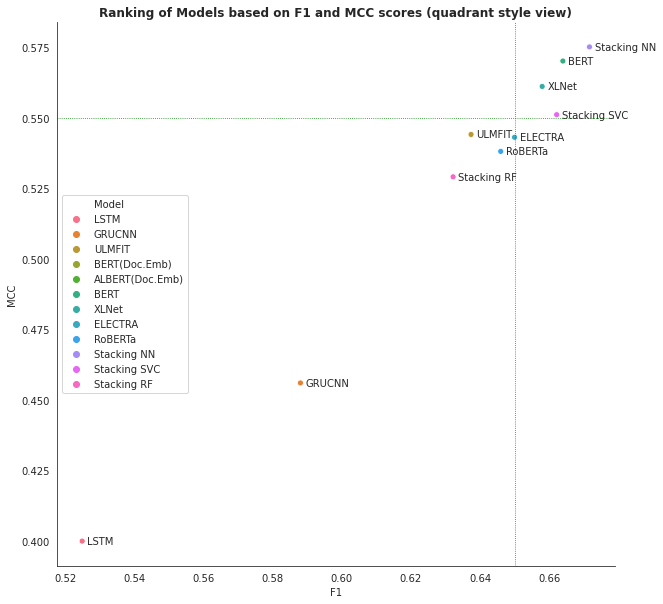

In [0]:
# displying how the models fare on MCC and F1 score. This helps in identifying top performing models 

sns.set_style('white')
p1=sns.scatterplot(x="F1", y="MCC", data=df_result,hue="Model")

# creating threshold line for MCC and F1 score. models above these lines falling in the top right corner of the grid are the top performing models

p1.axhline(0.55,linestyle = 'dotted',linewidth=0.8, color='g')
p1.axvline(0.65,linestyle = 'dotted',linewidth=0.8, color='g')

# annotating model names alongside the plot
for line in range(0,df_result.shape[0]):
     p1.text(df_result.F1[line]+0.0015, df_result.MCC[line], df_result.Model[line],horizontalalignment='left',verticalalignment='center',\
             size='medium')

plt.gcf().set_size_inches(10,10)
plt.title('Ranking of Models based on F1 and MCC scores (quadrant style view)',fontweight="bold")
sns.despine()
plt.show()

**Inference**:

1. The above plot clearly depicts how the models compare based on F1 and MCC scores
2. As can be seen visually, the top 4 models narrowed down for further analysis are clearly shown sitting on top right of the plot



**Display model scores for visual comparison : Parallel plot**

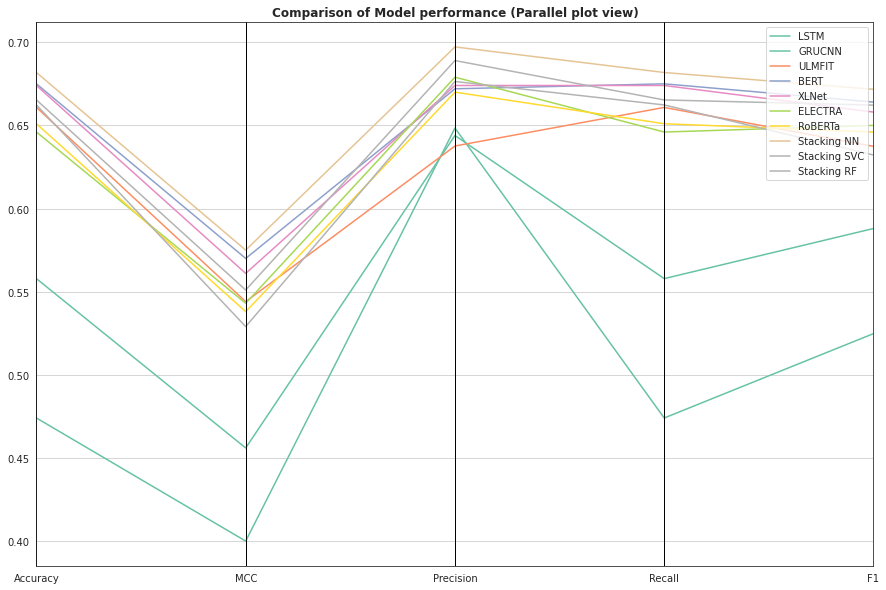

In [0]:
# displaying how the models compare on all key metrics

parallel_coordinates(df_result.dropna().drop('Variant',axis=1), 'Model', colormap=plt.get_cmap("Set2"))
plt.gcf().set_size_inches(15, 10)
plt.title('Comparison of Model performance (Parallel plot view)', fontweight='bold')
plt.show()

**Inference**:

1. The above plot clearly depicts how the models compare based on all metrics


**Display model scores for visual comparison : Bar plot**

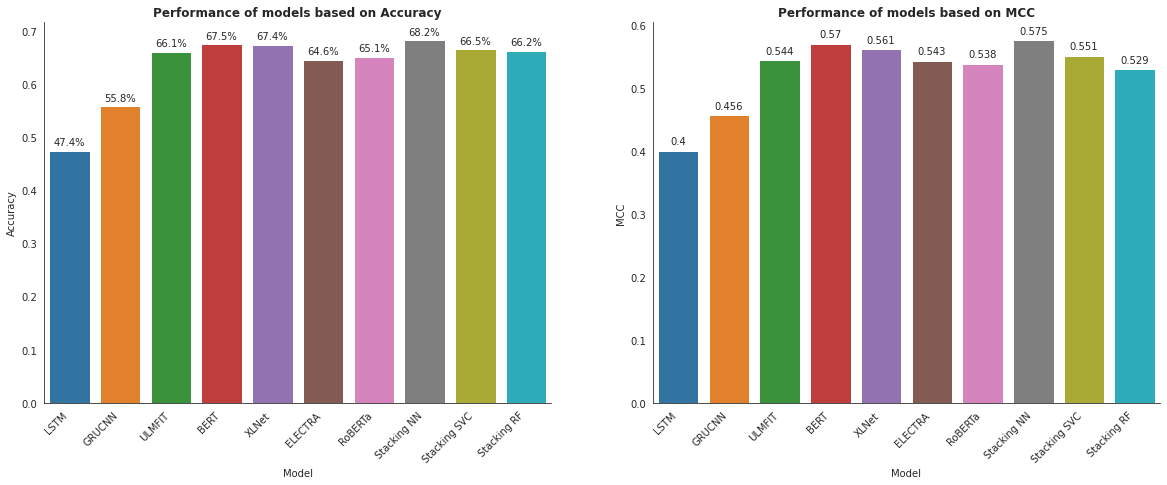

In [0]:
# displaying how models fare based on Accuracy and MCC measure - visual representation.

sns.set_style('white')

fig, ax =plt.subplots(1,2)
g=sns.barplot(data=df_result.dropna(), x = 'Model', y = 'Accuracy', ax=ax[0])
ax[0].set_title('Performance of models based on Accuracy', fontweight='bold')
i=sns.barplot(data=df_result.dropna(), x = 'Model', y = 'MCC', ax=ax[1])
ax[1].set_title('Performance of models based on MCC', fontweight='bold')
plt.gcf().set_size_inches(20, 7)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45,horizontalalignment='right') 

for p in g.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    g.annotate('{:.1%}'.format(height), (p.get_x()+.5*width, p.get_y() + height + 0.01), ha = 'center') 

for p in i.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    i.annotate('{:.3}'.format(height), (p.get_x()+.5*width, p.get_y() + height + 0.01), ha = 'center')        

fig.show()
sns.despine()

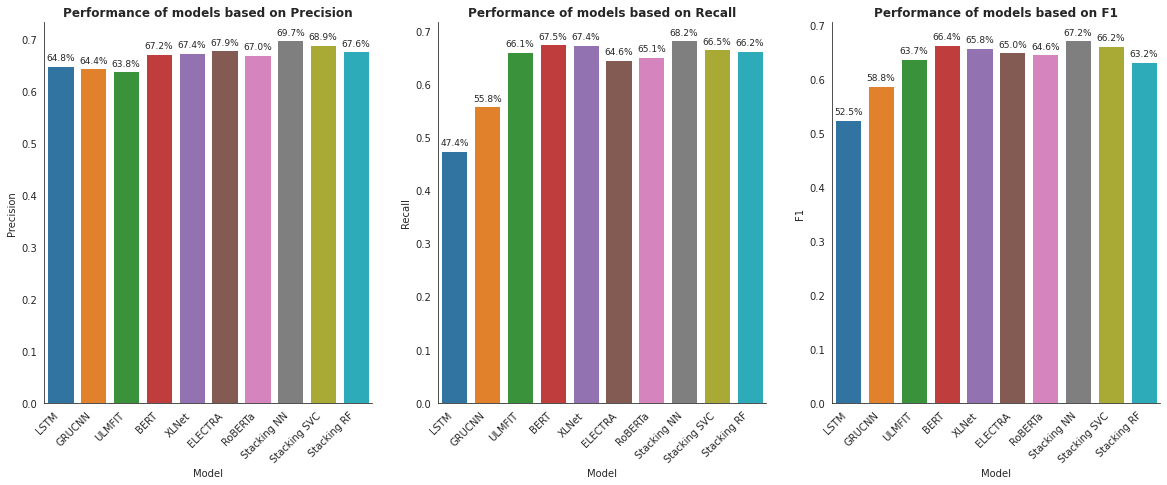

In [0]:
# displaying how models fare based on Precision,Recall and F1 measure - visual representation. 
# for this purpose only those models that are class balanced considered for proper comparison.

sns.set_style('white')
fig, ax =plt.subplots(1,3)
g=sns.barplot(data=df_result.dropna(), x = 'Model', y = 'Precision', ax=ax[0])
ax[0].set_title('Performance of models based on Precision', fontweight='bold')
i=sns.barplot(data=df_result.dropna(), x = 'Model', y = 'Recall', ax=ax[1])
ax[1].set_title('Performance of models based on Recall', fontweight='bold')
j=sns.barplot(data=df_result.dropna(), x = 'Model', y = 'F1', ax=ax[2])
ax[2].set_title('Performance of models based on F1', fontweight='bold')
plt.gcf().set_size_inches(20, 7)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45,horizontalalignment='right') 

for p in g.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    g.annotate('{:.1%}'.format(height), (p.get_x()+.5*width, p.get_y() + height + 0.01), ha = 'center', size=9) 

for p in i.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    i.annotate('{:.1%}'.format(height), (p.get_x()+.5*width, p.get_y() + height + 0.01), ha = 'center', size=9)  

for p in j.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    j.annotate('{:.1%}'.format(height), (p.get_x()+.5*width, p.get_y() + height + 0.01), ha = 'center', size=9)            

fig.show()
sns.despine()

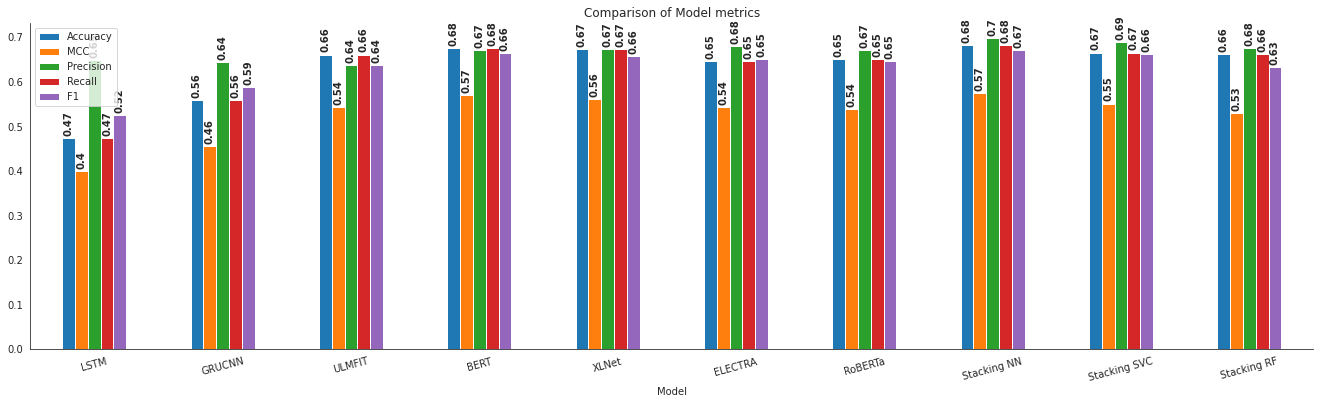

In [0]:
# displaying comparative metrics of all models where class balancing was done - visual representation

sns.set_style('white')   
ax = df_result.dropna().plot.bar(x="Model",rot=15,title = 'Comparison of Model metrics',figsize=(23,6))
#removing top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.2}'.format(height), (p.get_x()+.5*width, p.get_y() + height + 0.01), ha = 'center', rotation=90,fontsize=10,fontweight='bold')


**Inference**:

1. Based on the comparative analysis of results of all models, top 4 models are handpicked for further cross validation analysis
2. These models are - (1) Stacking NN (2) BERT (3) Stacking SVC and (4) XLNet




## **3.6 Cross Validation Evaluation for Top 4 Models**

### **3.6.1 Cross Validation Scores for Stacking NN Model**

**Setting up data and custom functions**

In [0]:
def create_model(optimizer='rmsprop',dense=256,do=0.8):
  stack_input = Input(shape=(296,), dtype='int32', name='stack_input')
  hidden = Dense(dense, activation='relu')(stack_input)
  dropout = Dropout(do)(hidden)
  output = Dense(74, activation='softmax')(dropout)
  model = Model(inputs=stack_input, outputs=output)
  model.compile(loss='categorical_crossentropy',optimizer=optimizer, metrics=['accuracy']) 
  return model

In [0]:
X_stkd = np.concatenate((X_train_stkd,X_test_stkd),axis=0)
y_stkd = np.concatenate((y_train,y_test),axis=0)
y_1D_stkd = np.concatenate((y_train_1D,y_test_1D),axis=0)

In [0]:
print(X_stkd.shape)
print(y_stkd.shape)
print(y_1D_stkd.shape)

(8467, 296)
(8467, 74)
(8467,)


**Executing Kfold cross validation**

In [0]:
num_folds = 5

acc_per_fold = []
f1_per_fold = []
mcc_per_fold = []

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True,random_state=seed)

# K-fold Cross Validation model evaluation
fold_no = 1

for train, test in kfold.split(X_stkd, y_stkd):

  # Define the model architecture
  model = create_model(optimizer='adam',dense=256,do=0.8)

  # Fit data to model
  
  model.fit(X_stkd[train], y_stkd[train],batch_size=32,epochs=20,verbose=0,validation_split=0.2)

  # generate metrics

  y_pred_stkd = model.predict(X_stkd[test], verbose=0)
  y_pred_1D_stkd = np.argmax(y_pred_stkd, axis=1)
  y_test_1D_stkd = np.argmax(y_stkd[test], axis=1)
  accuracy_fld,recall_fld,precision_fld,f1_fld,mcc_fld = calc_metrices(y_test_1D_stkd,y_pred_1D_stkd)

  # Generate generalization metrics
  scores = model.evaluate(X_stkd[test], y_stkd[test], verbose=0)
  acc_per_fold.append(accuracy_fld)
  f1_per_fold.append(f1_fld)
  mcc_per_fold.append(mcc_fld)

  # Increase fold number
  fold_no = fold_no + 1


**Analysing the results**

In [0]:
# reviewing the accuracy, mcc and f1 measure for all iterations

cv_snn_dict = {'Accuracy': acc_per_fold,'MCC': mcc_per_fold,'F1': f1_per_fold} 
cv_snn_result = pd.DataFrame(cv_snn_dict)
cv_snn_result.round(3)

Accuracy    MCC     F1
0     0.894  0.857  0.891
1     0.897  0.868  0.892
2     0.892  0.856  0.888
3     0.885  0.849  0.879
4     0.896  0.863  0.893

In [0]:
# printing the mean and standard deviation of accuracy, mcc and f1 measure 

print('Cross Validation-Stacking NN Model - Accuracy :','%.3f' %cv_snn_result['Accuracy'].mean(),'with Standard Deviation of +/-','%.3f' %cv_snn_result['Accuracy'].std())
print('Cross Validation-Stacking NN Model - MCC :','%.3f' %cv_snn_result['MCC'].mean(),'with Standard Deviation of +/-','%.3f' %cv_snn_result['MCC'].std())
print('Cross Validation-Stacking NN Model - F1 :','%.3f' %cv_snn_result['F1'].mean(),'with Standard Deviation of +/-','%.3f' %cv_snn_result['F1'].std())

# calculating the metrics ranges for 95% confidence level i.e  mean +/- 2*std dev

snn_acc_range =np.round(cv_snn_result['Accuracy'].mean()- 2*cv_snn_result['Accuracy'].std(),3),'to', np.round(cv_snn_result['Accuracy'].mean()+ 2*cv_snn_result['Accuracy'].std(),3)
snn_mcc_range =np.round(cv_snn_result['MCC'].mean()- 2*cv_snn_result['MCC'].std(),3),'to', np.round(cv_snn_result['MCC'].mean()+ 2*cv_snn_result['MCC'].std(),3)
snn_f1_range =np.round(cv_snn_result['F1'].mean()- 2*cv_snn_result['F1'].std(),3),'to', np.round(cv_snn_result['F1'].mean()+ 2*cv_snn_result['F1'].std(),3)

Cross Validation-Stacking NN Model - Accuracy : 0.893 with Standard Deviation of +/- 0.005
Cross Validation-Stacking NN Model - MCC : 0.859 with Standard Deviation of +/- 0.007
Cross Validation-Stacking NN Model - F1 : 0.889 with Standard Deviation of +/- 0.006


In [0]:
# storing the model output in dataframe for comparison purpose

storecvresult('Stacking NN','crossvalidated',round(cv_snn_result['Accuracy'].mean(),3),\
            round(cv_snn_result['MCC'].mean(),3),round(cv_snn_result['F1'].mean(),3),\
            snn_acc_range,snn_mcc_range,snn_f1_range)

**Inference**:

1. Based on 5 fold cross validation this model has given great scores with very low standard deviation

### **3.6.2 Cross Validation for Stacking SVC Model**

**Executing Kfold cross validation**

In [0]:
num_folds = 5

acc_per_fold = []
f1_per_fold = []
mcc_per_fold = []

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True,random_state=seed)

# K-fold Cross Validation model evaluation
fold_no = 1

for train, test in kfold.split(X_stkd, y_1D_stkd):

  # Define the model architecture
  model = SVC(kernel='rbf', random_state = seed,class_weight='balanced',C= 1, gamma= 0.001)

  # Fit data to model

  model.fit(X_stkd[train], y_1D_stkd[train].ravel())

  # generate metrics

  y_pred_1D_stkd = model.predict(X_stkd[test])

  accuracy_fld,recall_fld,precision_fld,f1_fld,mcc_fld = calc_metrices(y_1D_stkd[test],y_pred_1D_stkd)

  acc_per_fold.append(accuracy_fld)
  f1_per_fold.append(f1_fld)
  mcc_per_fold.append(mcc_fld)

  # Increase fold number
  fold_no = fold_no + 1

**Analysing the results**

In [0]:
# reviewing the accuracy, mcc and f1 measure for all iterations

cv_svc_dict = {'Accuracy': acc_per_fold,'MCC': mcc_per_fold,'F1': f1_per_fold} 
cv_svc_result = pd.DataFrame(cv_svc_dict)
cv_svc_result.round(3)

Accuracy    MCC     F1
0     0.854  0.813  0.864
1     0.839  0.803  0.862
2     0.853  0.814  0.860
3     0.852  0.813  0.858
4     0.866  0.831  0.875

In [0]:
# printing the mean and standard deviation of accuracy, mcc and f1 measure 

print('Cross Validation-Stacking SVC Model - Accuracy :','%.3f' %cv_svc_result['Accuracy'].mean(),'with Standard Deviation of +/-','%.3f' %cv_svc_result['Accuracy'].std())
print('Cross Validation-Stacking SVC Model - MCC :','%.3f' %cv_svc_result['MCC'].mean(),'with Standard Deviation of +/-','%.3f' %cv_svc_result['MCC'].std())
print('Cross Validation-Stacking SVC Model - F1 :','%.3f' %cv_svc_result['F1'].mean(),'with Standard Deviation of +/-','%.3f' %cv_svc_result['F1'].std())

# calculating the metrics ranges for 95% confidence level i.e  mean +/- 2*std dev

ssvc_acc_range =np.round(cv_svc_result['Accuracy'].mean()- 2*cv_svc_result['Accuracy'].std(),3),'to', np.round(cv_svc_result['Accuracy'].mean()+ 2*cv_svc_result['Accuracy'].std(),3)
ssvc_mcc_range =np.round(cv_svc_result['MCC'].mean()- 2*cv_svc_result['MCC'].std(),3),'to', np.round(cv_svc_result['MCC'].mean()+ 2*cv_svc_result['MCC'].std(),3)
ssvc_f1_range =np.round(cv_svc_result['F1'].mean()- 2*cv_svc_result['F1'].std(),3),'to', np.round(cv_svc_result['F1'].mean()+ 2*cv_svc_result['F1'].std(),3)



Cross Validation-Stacking SVC Model - Accuracy : 0.853 with Standard Deviation of +/- 0.010
Cross Validation-Stacking SVC Model - MCC : 0.815 with Standard Deviation of +/- 0.010
Cross Validation-Stacking SVC Model - F1 : 0.864 with Standard Deviation of +/- 0.007


In [0]:
# storing the model output in dataframe for comparison purpose

storecvresult('Stacking SVC','crossvalidated',round(cv_svc_result['Accuracy'].mean(),3),\
            round(cv_svc_result['MCC'].mean(),3),round(cv_svc_result['F1'].mean(),3),\
            ssvc_acc_range,ssvc_mcc_range,ssvc_f1_range)

**Inference**:

1. Based on 5 fold cross validation this model has given high scores with very marginally low standard deviation

### **3.6.3 Cross Validation for BERT Model**

**Setting up custom functions**

In [0]:
# creating function to create,train and evaluate transformer models based on input parameters


def cv_transformermodels(model_type,model_name,train_df,eval_df,lr,wd,batch_size):

  sample_size = len(train_df)
  steps = round(sample_size/batch_size)

  train_args = {
    'manual_seed': seed,
    'output_dir': f"outputs_cv/{model_type}",
    'best_model_dir': f"outputs_cv/{model_type}/best_model",    
    'max_seq_length': 128,
    'num_train_epochs': 5,
    'train_batch_size': batch_size,
    'eval_batch_size': batch_size,
    'do_lower_case':True,
    'gradient_accumulation_steps': 1,
    'learning_rate': lr,
    'weight_decay': wd,
    'adam_epsilon': 1e-8,    
    'evaluate_during_training': False,
    'evaluate_during_training_steps': steps,
    'save_eval_checkpoints': False,
    'save_steps': 50000,            
    'reprocess_input_data': True,
    'save_model_every_epoch': False,
    'overwrite_output_dir': True,
    'no_cache': True,
    'use_early_stopping': True,
    'early_stopping_consider_epochs': True, 
    'early_stopping_metric':'mcc',
    'early_stopping_metric_minimize':False,
    'early_stopping_delta': 0.01,
    'early_stopping_patience': 2,
    }

  # Create the model

  model = ClassificationModel(model_type, model_name, num_labels=74, args=train_args,use_cuda=True)
  
  # Train the model

  model.train_model(train_df, eval_df=eval_df,show_running_loss=True,f1=f1_multiclass,prec=prec_multiclass,rec=rec_multiclass, acc=acc_score)
  
  # Evaluate the model

  result, _, _ = model.eval_model(eval_df, f1=f1_multiclass,acc=acc_score)

  return result

**Executing Kfold cross validation**

In [0]:
num_folds = 5

acc_per_fold = []
f1_per_fold = []
mcc_per_fold = []


# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True,random_state=seed)
kfold.split(mydata_tm)   

# K-fold Cross Validation model evaluation
fold_no = 1

for train_index, test_index in kfold.split(mydata_tm):
    # Split train-test
    train_df = mydata_tm.iloc[train_index]
    eval_df = mydata_tm.iloc[test_index]

    bert_cvresult = cv_transformermodels('bert', 'bert-base-uncased',train_df,eval_df,lr=4e-5,wd=0.09,batch_size=8)
    
    accuracy_fld = round(bert_cvresult["acc"],3)
    f1_fld = round(bert_cvresult["f1"],3)
    mcc_fld = round(bert_cvresult["mcc"],3)

    acc_per_fold.append(accuracy_fld)
    f1_per_fold.append(f1_fld)
    mcc_per_fold.append(mcc_fld)

      # Increase fold number
    fold_no = fold_no + 1


Selected optimization level O1:  Insert automatic casts around Pytorch functions and Tensor methods.

Defaults for this optimization level are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic
Processing user overrides (additional kwargs that are not None)...
After processing overrides, optimization options are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic


Running loss: 4.329463Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 32768.0
Running loss: 2.922231Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0
Running loss: 1.389571Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 8192.0
Running loss: 1.901501


Running loss: 1.527604


Running loss: 0.815261


Running loss: 0.878790Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 8192.0
Running loss: 0.801812


Running loss: 0.430554




Selected optimization level O1:  Insert automatic casts around Pytorch functions and Tensor methods.

Defaults for this optimization level are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic
Processing user overrides (additional kwargs that are not None)...
After processing overrides, optimization options are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic


Running loss: 4.174013Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 32768.0
Running loss: 1.813231Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0
Running loss: 3.363499


Running loss: 2.430556Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 8192.0
Running loss: 1.917117


Running loss: 1.239004Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 4096.0
Running loss: 1.610831Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 2048.0
Running loss: 0.927112


Running loss: 1.356291


Running loss: 0.554107




Selected optimization level O1:  Insert automatic casts around Pytorch functions and Tensor methods.

Defaults for this optimization level are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic
Processing user overrides (additional kwargs that are not None)...
After processing overrides, optimization options are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic


Running loss: 4.226450Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 32768.0
Running loss: 3.964393Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0
Running loss: 2.255528


Running loss: 1.745304Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 8192.0
Running loss: 0.113233


Running loss: 0.296138


Running loss: 1.923313


Running loss: 0.192665




Selected optimization level O1:  Insert automatic casts around Pytorch functions and Tensor methods.

Defaults for this optimization level are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic
Processing user overrides (additional kwargs that are not None)...
After processing overrides, optimization options are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic


Running loss: 4.078510Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 32768.0
Running loss: 2.184679Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0
Running loss: 2.187901


Running loss: 2.369659


Running loss: 2.851274Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0
Running loss: 1.141228


Running loss: 0.408687


Running loss: 0.208111




Selected optimization level O1:  Insert automatic casts around Pytorch functions and Tensor methods.

Defaults for this optimization level are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic
Processing user overrides (additional kwargs that are not None)...
After processing overrides, optimization options are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic


Running loss: 4.323408Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 32768.0
Running loss: 4.270413Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0
Running loss: 0.726348


Running loss: 1.157255Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 8192.0
Running loss: 1.307266


Running loss: 1.606303


Running loss: 0.544394


Running loss: 0.794815Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 8192.0
Running loss: 0.779849Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 4096.0
Running loss: 0.079308



**Analysing the results**

In [0]:
# reviewing the accuracy, mcc and f1 measure for all iterations

cv_bert_dict = {'Accuracy': acc_per_fold,'MCC': mcc_per_fold,'F1': f1_per_fold} 
cv_bert_result = pd.DataFrame(cv_bert_dict)
cv_bert_result.round(3)

Accuracy    MCC     F1
0     0.702  0.603  0.673
1     0.688  0.573  0.667
2     0.672  0.566  0.635
3     0.682  0.578  0.652
4     0.692  0.591  0.660

In [0]:
# printing the mean and standard deviation of accuracy, mcc and f1 measure 

print('Cross Validation-BERT Model - Accuracy :','%.3f' %cv_bert_result['Accuracy'].mean(),'with Standard Deviation of +/-','%.3f' %cv_bert_result['Accuracy'].std())
print('Cross Validation-BERT Model - MCC :','%.3f' %cv_bert_result['MCC'].mean(),'with Standard Deviation of +/-','%.3f' %cv_bert_result['MCC'].std())
print('Cross Validation-BERT Model - F1 :','%.3f' %cv_bert_result['F1'].mean(),'with Standard Deviation of +/-','%.3f' %cv_bert_result['F1'].std())

# calculating the metrics ranges for 95% confidence level i.e  mean +/- 2*std dev

bert_acc_range =np.round(cv_bert_result['Accuracy'].mean()- 2*cv_bert_result['Accuracy'].std(),3),'to', np.round(cv_bert_result['Accuracy'].mean()+ 2*cv_bert_result['Accuracy'].std(),3)
bert_mcc_range =np.round(cv_bert_result['MCC'].mean()- 2*cv_bert_result['MCC'].std(),3),'to', np.round(cv_bert_result['MCC'].mean()+ 2*cv_bert_result['MCC'].std(),3)
bert_f1_range =np.round(cv_bert_result['F1'].mean()- 2*cv_bert_result['F1'].std(),3),'to', np.round(cv_bert_result['F1'].mean()+ 2*cv_bert_result['F1'].std(),3)

Cross Validation-BERT Model - Accuracy : 0.687 with Standard Deviation of +/- 0.011
Cross Validation-BERT Model - MCC : 0.582 with Standard Deviation of +/- 0.015
Cross Validation-BERT Model - F1 : 0.657 with Standard Deviation of +/- 0.015


In [0]:
# storing the model output in dataframe for comparison purpose

storecvresult('BERT','crossvalidated',round(cv_bert_result['Accuracy'].mean(),3),\
            round(cv_bert_result['MCC'].mean(),3),round(cv_bert_result['F1'].mean(),3),\
            bert_acc_range,bert_mcc_range,bert_f1_range)

**Inference**:

1. Based on 5 fold cross validation, the model has given good scores , though not as high as stacking models
2. The standard deviation is also marginally lower

### **3.6.4 Cross Validation for XLNet Model**

**Executing Kfold cross validation**

In [0]:
num_folds = 5

acc_per_fold = []
f1_per_fold = []
mcc_per_fold = []


# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True,random_state=seed)
kfold.split(mydata_tm)   

# K-fold Cross Validation model evaluation
fold_no = 1

for train_index, test_index in kfold.split(mydata_tm):
    # Split train-test
    train_df = mydata_tm.iloc[train_index]
    eval_df = mydata_tm.iloc[test_index]

    xlnet_cvresult = cv_transformermodels('xlnet', 'xlnet-base-cased',train_df,eval_df,lr=3e-5,wd=0,batch_size=16)
    
    accuracy_fld = round(xlnet_cvresult["acc"],3)
    f1_fld = round(xlnet_cvresult["f1"],3)
    mcc_fld = round(xlnet_cvresult["mcc"],3)

    acc_per_fold.append(accuracy_fld)
    f1_per_fold.append(f1_fld)
    mcc_per_fold.append(mcc_fld)

      # Increase fold number
    fold_no = fold_no + 1


Selected optimization level O1:  Insert automatic casts around Pytorch functions and Tensor methods.

Defaults for this optimization level are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic
Processing user overrides (additional kwargs that are not None)...
After processing overrides, optimization options are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic


Running loss: 4.212090Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 32768.0
Running loss: 4.376662Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0
Running loss: 2.528650


Running loss: 1.494638


Running loss: 0.719492


Running loss: 0.827099


Running loss: 0.235133




Selected optimization level O1:  Insert automatic casts around Pytorch functions and Tensor methods.

Defaults for this optimization level are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic
Processing user overrides (additional kwargs that are not None)...
After processing overrides, optimization options are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic


Running loss: 4.321448Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 32768.0
Running loss: 4.192007Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0
Running loss: 1.004834


Running loss: 1.631580


Running loss: 2.330400


Running loss: 0.214325


Running loss: 0.332659




Selected optimization level O1:  Insert automatic casts around Pytorch functions and Tensor methods.

Defaults for this optimization level are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic
Processing user overrides (additional kwargs that are not None)...
After processing overrides, optimization options are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic


Running loss: 4.110715Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 32768.0
Running loss: 3.910132Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0
Running loss: 3.806579Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 8192.0
Running loss: 1.556889


Running loss: 1.953333


Running loss: 1.147744


Running loss: 1.449461


Running loss: 0.537637




Selected optimization level O1:  Insert automatic casts around Pytorch functions and Tensor methods.

Defaults for this optimization level are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic
Processing user overrides (additional kwargs that are not None)...
After processing overrides, optimization options are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic


Running loss: 4.323526Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 32768.0
Running loss: 3.894243Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0
Running loss: 1.934502Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 8192.0
Running loss: 1.995365


Running loss: 2.612580


Running loss: 1.342112


Running loss: 0.319874


Running loss: 0.974899




Selected optimization level O1:  Insert automatic casts around Pytorch functions and Tensor methods.

Defaults for this optimization level are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic
Processing user overrides (additional kwargs that are not None)...
After processing overrides, optimization options are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic


Running loss: 4.118085Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 32768.0
Running loss: 4.065329Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0
Running loss: 4.117665Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 8192.0
Running loss: 0.878945


Running loss: 0.800482


Running loss: 1.464466


Running loss: 2.089103


Running loss: 1.922416



**Analysing the results**

In [0]:
# reviewing the accuracy, mcc and f1 measure for all iterations

cv_xlnet_dict = {'Accuracy': acc_per_fold,'MCC': mcc_per_fold,'F1': f1_per_fold} 
cv_xlnet_result = pd.DataFrame(cv_xlnet_dict)
cv_xlnet_result.round(3)

Accuracy    MCC     F1
0     0.683  0.575  0.650
1     0.672  0.550  0.642
2     0.648  0.531  0.610
3     0.664  0.548  0.625
4     0.683  0.572  0.642

In [0]:
# printing the mean and standard deviation of accuracy, mcc and f1 measure 

print('Cross Validation-XLNet Model - Accuracy :','%.3f' %cv_xlnet_result['Accuracy'].mean(),'with Standard Deviation of +/-','%.3f' %cv_xlnet_result['Accuracy'].std())
print('Cross Validation-XLNet Model - MCC :','%.3f' %cv_xlnet_result['MCC'].mean(),'with Standard Deviation of +/-','%.3f' %cv_xlnet_result['MCC'].std())
print('Cross Validation-XLNet Model - F1 :','%.3f' %cv_xlnet_result['F1'].mean(),'with Standard Deviation of +/-','%.3f' %cv_xlnet_result['F1'].std())

# calculating the metrics ranges for 95% confidence level i.e  mean +/- 2*std dev

xlnet_acc_range =np.round(cv_xlnet_result['Accuracy'].mean()- 2*cv_xlnet_result['Accuracy'].std(),3),'to', np.round(cv_xlnet_result['Accuracy'].mean()+ 2*cv_xlnet_result['Accuracy'].std(),3)
xlnet_mcc_range =np.round(cv_xlnet_result['MCC'].mean()- 2*cv_xlnet_result['MCC'].std(),3),'to', np.round(cv_xlnet_result['MCC'].mean()+ 2*cv_xlnet_result['MCC'].std(),3)
xlnet_f1_range =np.round(cv_xlnet_result['F1'].mean()- 2*cv_xlnet_result['F1'].std(),3),'to', np.round(cv_xlnet_result['F1'].mean()+ 2*cv_xlnet_result['F1'].std(),3)

Cross Validation-XLNet Model - Accuracy : 0.670 with Standard Deviation of +/- 0.015
Cross Validation-XLNet Model - MCC : 0.555 with Standard Deviation of +/- 0.018
Cross Validation-XLNet Model - F1 : 0.634 with Standard Deviation of +/- 0.016


In [0]:
# storing the model output in dataframe for comparison purpose

storecvresult('XLNet','crossvalidated',round(cv_xlnet_result['Accuracy'].mean(),3),\
            round(cv_xlnet_result['MCC'].mean(),3),round(cv_xlnet_result['F1'].mean(),3),\
            xlnet_acc_range,xlnet_mcc_range,xlnet_f1_range)

**Inference**:

1. Based on 5 fold cross validation, the model has given good scores , though not as high as stacking models and even BERT. 
2. The standard deviation is also marginally lower

## **3.7 Visualization and Final Summary**

### **3.7.1 Review final model performance data**

In [0]:
df_cvresult.sort_values(by='CV Mean F1', ascending=False).style.set_table_styles([dict(selector='th',props=[('text-align','center')])]).hide_index()\
                    .highlight_max(axis=0)\
                    .format("{:.2%}",subset=['CV Mean Accuracy','CV Mean F1'])

**Inference**:


1. As shown in the table, stacking based models give more than 85% score on all key parameters (MCC and F1) , based on cross validated metrics
2. Of the stacking models, Stacking NN gives the highest result.
3. The Stacking NN model also has very impressive confidence level range for all key metrics
4. BERT model comes third by a wide margin  but this still scores the highest among transformer models
5. XLNet comes last with lowest scores

### **3.7.2 Display model scores for visual comparison : Barplot**

In [0]:
# for the purpose of visual comparison creating a new dataframe with selected columns and renaming the columns names for eaze of display

df_cvresult2=df_cvresult.filter(['Model','CV Mean Accuracy','CV Mean MCC','CV Mean F1'], axis=1)
df_cvresult2.rename(columns={"CV Mean Accuracy": "Accuracy", "CV Mean MCC": "MCC", "CV Mean F1": "F1"},inplace=True)

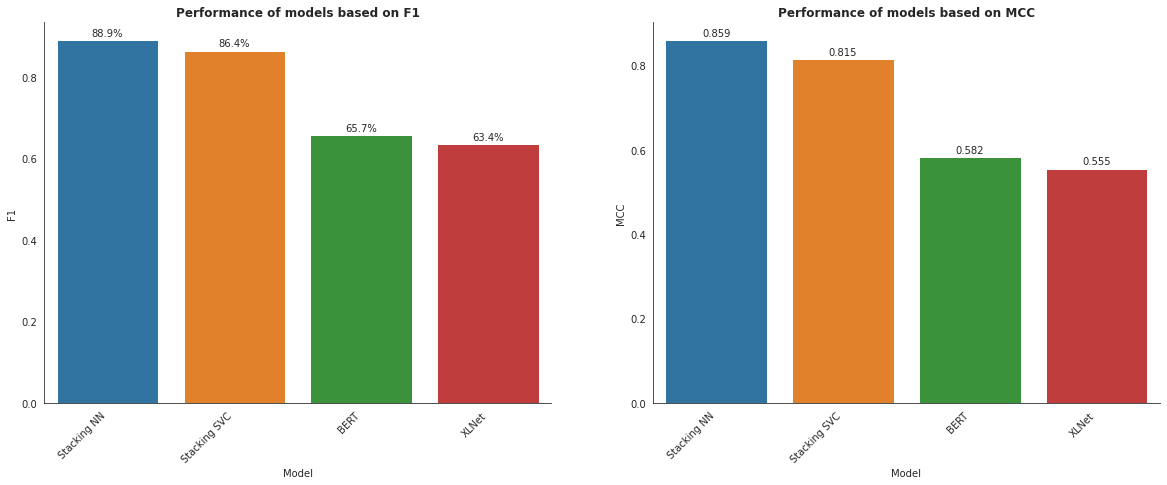

In [0]:
# displaying how models fare based on F1 and MCC measure - visual representation.

sns.set_style('white')

fig, ax =plt.subplots(1,2)
g=sns.barplot(data=df_cvresult2, x = 'Model', y = 'F1', ax=ax[0])
ax[0].set_title('Performance of models based on F1', fontweight='bold')
i=sns.barplot(data=df_cvresult2, x = 'Model', y = 'MCC', ax=ax[1])
ax[1].set_title('Performance of models based on MCC', fontweight='bold')
plt.gcf().set_size_inches(20, 7)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45,horizontalalignment='right') 

for p in g.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    g.annotate('{:.1%}'.format(height), (p.get_x()+.5*width, p.get_y() + height + 0.01), ha = 'center') 

for p in i.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    i.annotate('{:.3}'.format(height), (p.get_x()+.5*width, p.get_y() + height + 0.01), ha = 'center')        

fig.show()
sns.despine()

**Inference**:


1.   As clearly seen visually, Stacking NN takes the first rank in the metrics comparision , closely followed by Stacking SVC in 2nd place
2.  Pureplay transformer models are lagging way behind the stacking models, though between the transformer models, BERT is showing marginally better scores ( cross validated)

### **3.7.3 Display model scores for visual comparison : Radar Chart**

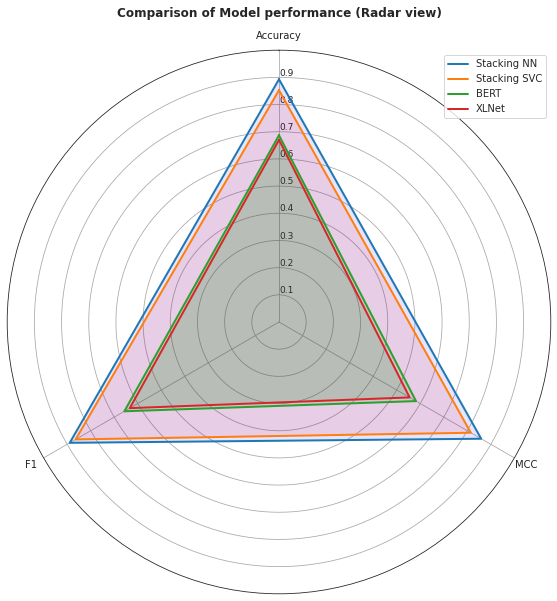

In [0]:
# creating radar chart for visually comparing model metrics across all models crossvalidated

radar = df_cvresult2.loc[:, ['Model', 'Accuracy','MCC','F1']]
  
# setting the number of variable

categories=list(radar)[1:]
N = len(categories)
 
# setting the angle of each axis in the plot

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialising the spider plot

ax = plt.subplot(111, polar=True)

ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# setting x values

plt.xticks(angles[:-1], categories)
 
# setting ylabels

ax.set_rlabel_position(0)
plt.yticks([.10,.20,.30,.40,.50,.60,.70,.80,.90], ["0.1","0.2","0.3","0.4","0.5","0.6","0.7","0.8","0.9"], color="grey", size=7)
plt.ylim(0,1.00)
 
# plotting the values for Stacking NN

values=radar.loc[0].drop(['Model']).values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=2, linestyle='solid', label="Stacking NN")
ax.fill(angles, values, 'b', alpha=0.1)
 
# plotting the values for Stacking SVC

values=radar.loc[1].drop(['Model']).values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=2, linestyle='solid', label="Stacking SVC")
ax.fill(angles, values, 'r', alpha=0.1)

# plotting the values for BERT

values=radar.loc[2].drop(['Model']).values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=2, linestyle='solid', label="BERT")
ax.fill(angles, values, 'g', alpha=0.1)
 
# plotting the values for XLNet

values=radar.loc[3].drop(['Model']).values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=2, linestyle='solid', label="XLNet")
ax.fill(angles, values, 'g', alpha=0.1)

# adding title

ax.set_title('Comparison of Model performance (Radar view)', fontweight='bold')

# adding legend
plt.legend(loc=1)

# changing the color of the tick labels.

ax.tick_params(colors='#222222')

# adjusting y labels

ax.tick_params(axis='y', labelsize=9)

# changing the color of the circular gridlines

ax.grid(color='#AAAAAA')

# changing the color of the outermost gridline 

ax.spines['polar'].set_color('#222222')

# setting the chart size

plt.gcf().set_size_inches(10, 10)

**Inference**:


1.   As clearly seen visually, stacking based models outperform pure play transformer models by a wide margin ( on all parameters)
2.  Among the stacking models, NN based stacking performs better than SVC based stacking

### **3.7.4 Display model scores for visual comparison : Parallel Plot**

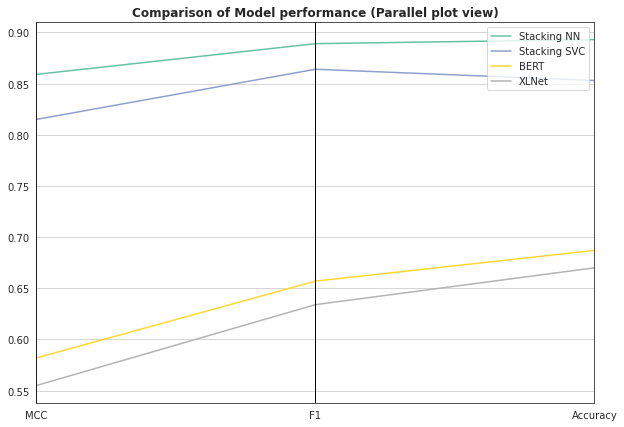

In [0]:
# displaying model comparison based on parallel plot

parallel_coordinates(df_cvresult2, 'Model',cols=['MCC', 'F1', 'Accuracy'], colormap=plt.get_cmap("Set2"))
plt.gcf().set_size_inches(10, 7)
plt.title('Comparison of Model performance (Parallel plot view)', fontweight='bold')
plt.show()

**Inference**:


1.   As clearly seen visually, stacking based models outperform pure play transformer models by a wide margin ( on all parameters)
2.  Among the stacking models, NN based stacking performs better than SVC based stacking

###**3.7.5 Final Summary**


1.   Overall, the given dataset was analyzed and several data quality issues, inconsistencies were identified. In addition, the classes were highly imbalanced.
2.   While most of the data quality issue was handled using preprocessing techniques, it still carried residual issues like non-english,inconsistent grouping for similar set of issues etc. These issues are impacting the overall model performance.
3.   Though class balancing was handled using class weights, this skewness in the data shows that either data is insufficient, or some assignment groups are rare ,perhaps because these are steady state stable ares that do not need IT resolution or too many issues are getting reported on too few areas.
4.  Stacking of Transformer model outputs based on Neural Network has outperformed all other models and the cross validated values (MCC and F1) shows that this model is giving the highest numbers with excellent confidence level ranges on all key metrics
5.  The second model to perform equally close is 'Stacking of Transformer model output based on SVC'. The performance metrics values ( MCC,F1) are only marginally lower than Stacking based on Neural Network but is way above the mark compared to pure play transformer models
6. With new architectures emerging in the area of NLP, a stacking based approach seems to take advantage of all the benefits of transformers and yet leveraging stacking concepts to produce superior results
7. This 'Stacking NN' model may be considered for production deployment and monitoring based on continuious flow of additional dataset and as a best practice, periodical review and tuning needs to be done on an ongoing basis

## **3.8 Implications, Limitations and Closing reflections**

###**3.8.1 Implications**

1. The clasification solution evaluated and narrowed down ( Stacking NN model) will assist the IT support process automate ticket classification with 88.3%- 90.3% accuracy ( @ 95% confidence level) and thereby reduce manual intervention and errors to a greater extent
2. As a next step recommendation, this model can be recommended for production deployment with the expection set correctly ( with respect to the accuracy % that can be expected)
3. However given the fact that the tickets classification input data has lot of inconsistencies ( as noted in interim submission), it may be possible that certain tickets may not be classified correctly. Hence manual intervention may be required to  reclassify any incorrect assignment ( for a limited period of time ).
4. Root cause for this need to be identified and addressed as this will help improve accuracy of the automatic ticket classification model
5. Further the model need to be monitored to track the actual performance and periodically need to be refined to reflect the any change/improvement/new group addition in ticket classification process

###**3.8.2 Limitations**


1. The classification model is built based on the input data set provided and hence is largely impacted by any skewness/ quality of the data provided
2. Some of the groups were not adequately represented in the input dataset provided and hence the model may not have learnt the required criteria for classification completely
3. Futher inconsistencies noted in the input data set ( where tickets with similar issue assigned to different groups) will also impact the output of the model when deployed in production
4. The input dataset had only 74 groups and hence if there are any new groups created at the source in the meantime, the model will not be able to classify new groups correctly till further model refinement is done
5. Additional collection of dataset ( volume standpoint) , fixing of classification inconsistencies ( quality standpoint) can be done to enhance the solution performance, apart from constant evalaution of new state of the art NLP architectures for improved performance



###**3.8.2 Closing reflections**

1. From Capstone project execution standpoint, this project has helped us understand the nuances and complexities involved in a text classification problem statement
2. There are so many model selection criteria to be evaluated ( right from embedding to core model) with lot of library variants and NLP frameworks out there for understanding, implementation and evaluation
3. While some of the classic ml concepts were relatively straight forward, understanding and implementation of state of the art NLP architectures needs lot of literate review, documentation perusal and trial and error hands on approaches to get the desired result
4. One of the interesting revelation for us was the usage of custom stacking approaches on top of state of the art transformer NLP models and how it can be used to achieve better scores
5. Though we have evaluated several model alternatives that we could , in the given project timeline, we will strive to improve by experimenting other model alternatives including contextualized document embedding options and use stacking on top of the results